Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [57]:
df = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [58]:
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

# Creating actual data

In [59]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [60]:
df.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'QT','cc':'CC'},inplace=True)
df

Id                                              Model  Price  Age  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   23   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   23   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   24   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   26   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   30   
...    ...                                                ...    ...  ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   69   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   72   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   71   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   70   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   76   

      Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
0            10      2002  46986    Diesel   90          1  ...            1   
1            10      2002  72937    Diesel   90          1  ...            1   
2             9      2002  41711    Diesel   90          1  ...            0   
3             7      2002  48000    Diesel   90          0  ...            0   
4             3      2002  38500    Diesel   90          0  ...            1   
...         ...       ...    ...       ...  ...        ...  ...          ...   
1431         12      1998  20544    Petrol   86          1  ...            1   
1432          9      1998  19000    Petrol   86          0  ...            0   
1433         10      1998  17016    Petrol   86          0  ...            0   
1434         11      1998  16916    Petrol   86          1  ...            0   
1435          5      1998      1    Petrol  110          0  ...            0   

      Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                   1               1      0          0            0   
1                   0               1      0          0            0   
2                   0               1      0          0            0   
3                   0               1      0          0            0   
4                   1               1      0          1            0   
...               ...             ...    ...        ...          ...   
1431                1               1      0          1            1   
1432                0               1      0          0            1   
1433                0               1      0          0            0   
1434                0               0      0          0            0   
1435                0               1      0          0            0   

      Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                    1             0               0        0  
1                    1             0               0        0  
2                    1             0               0        0  
3                    1             0               0        0  
4                    1             0               0        0  
...                ...           ...             ...      ...  
1431                 1             0               0        0  
1432                 1             0               0        0  
1433                 1             0               0        0  
1434                 1             0               0        0  
1435                 0             0               0        0  

[1436 rows x 38 columns]

In [61]:
df.shape

(1436, 38)

In [62]:
df=df[['Price','Age','KM','HP','CC','Doors','Gears','QT','Weight']]

In [63]:
df.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [65]:
df.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [66]:
df[df.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [67]:
df = df.drop_duplicates().reset_index(drop=True)

In [68]:
df

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [69]:
df.describe()

Price          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears           QT       Weight  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

# Data Visulazation

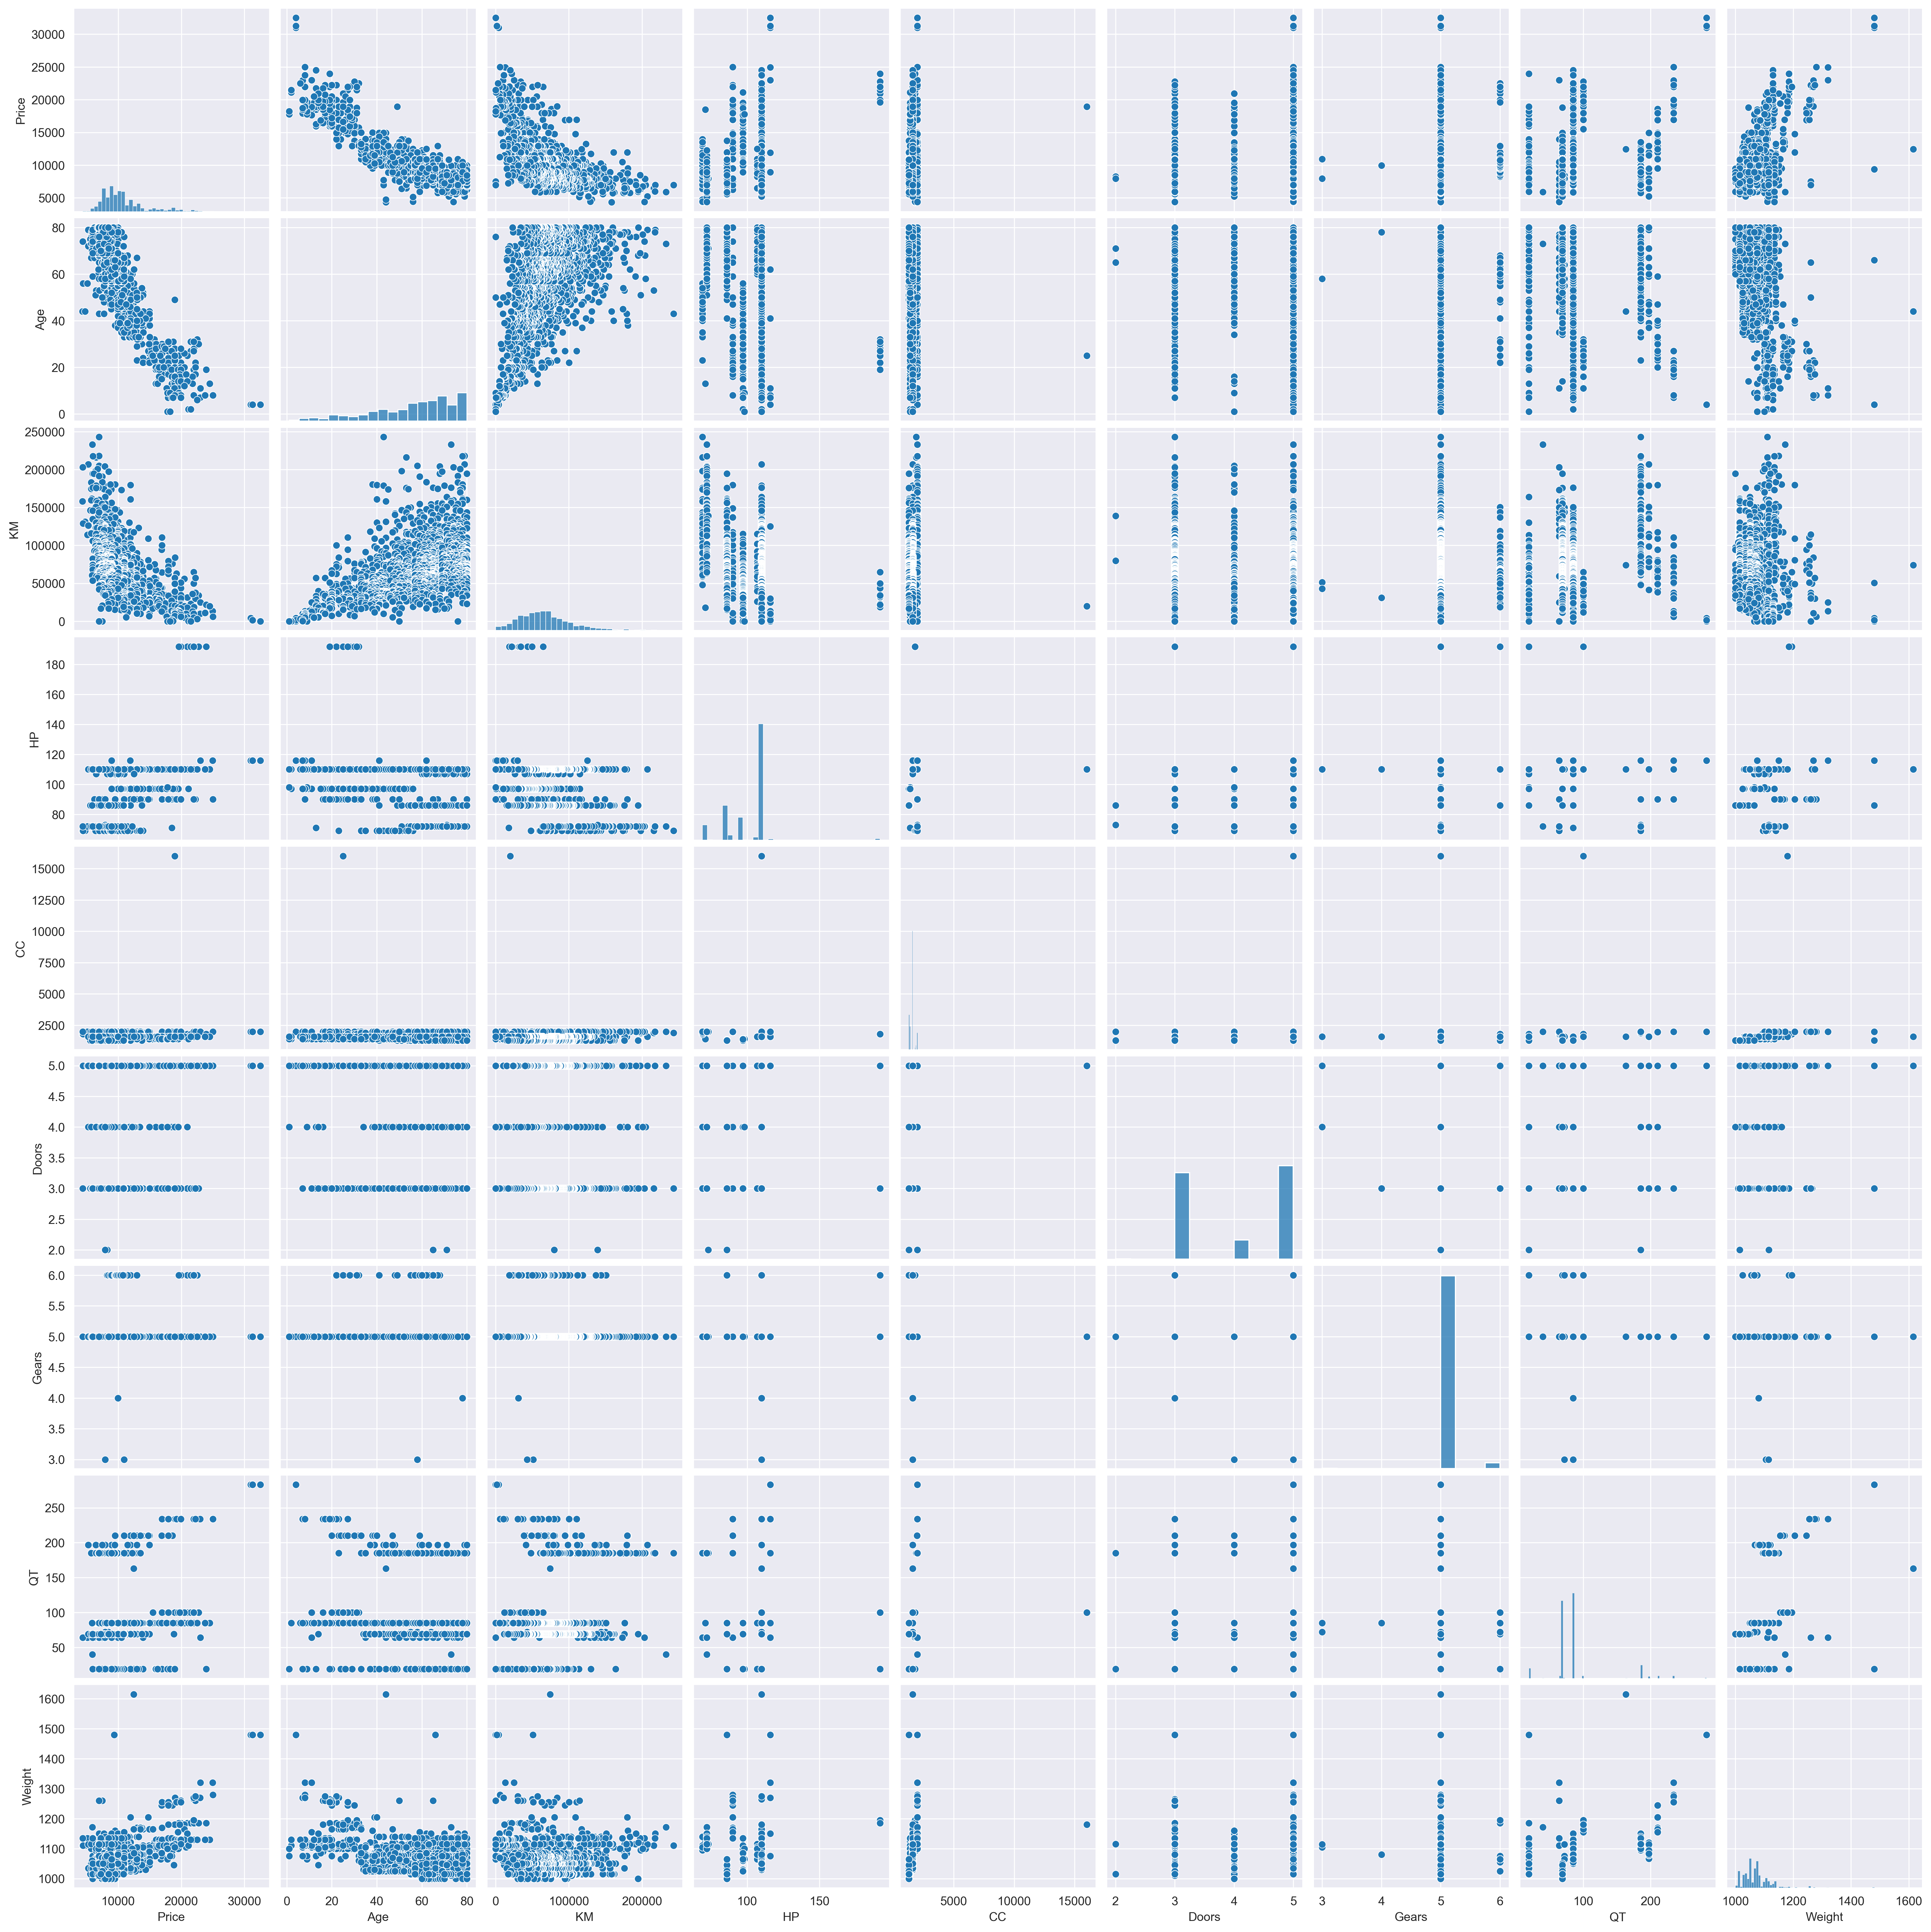

In [70]:
sns.pairplot(df)

# Correlation

<Axes: >

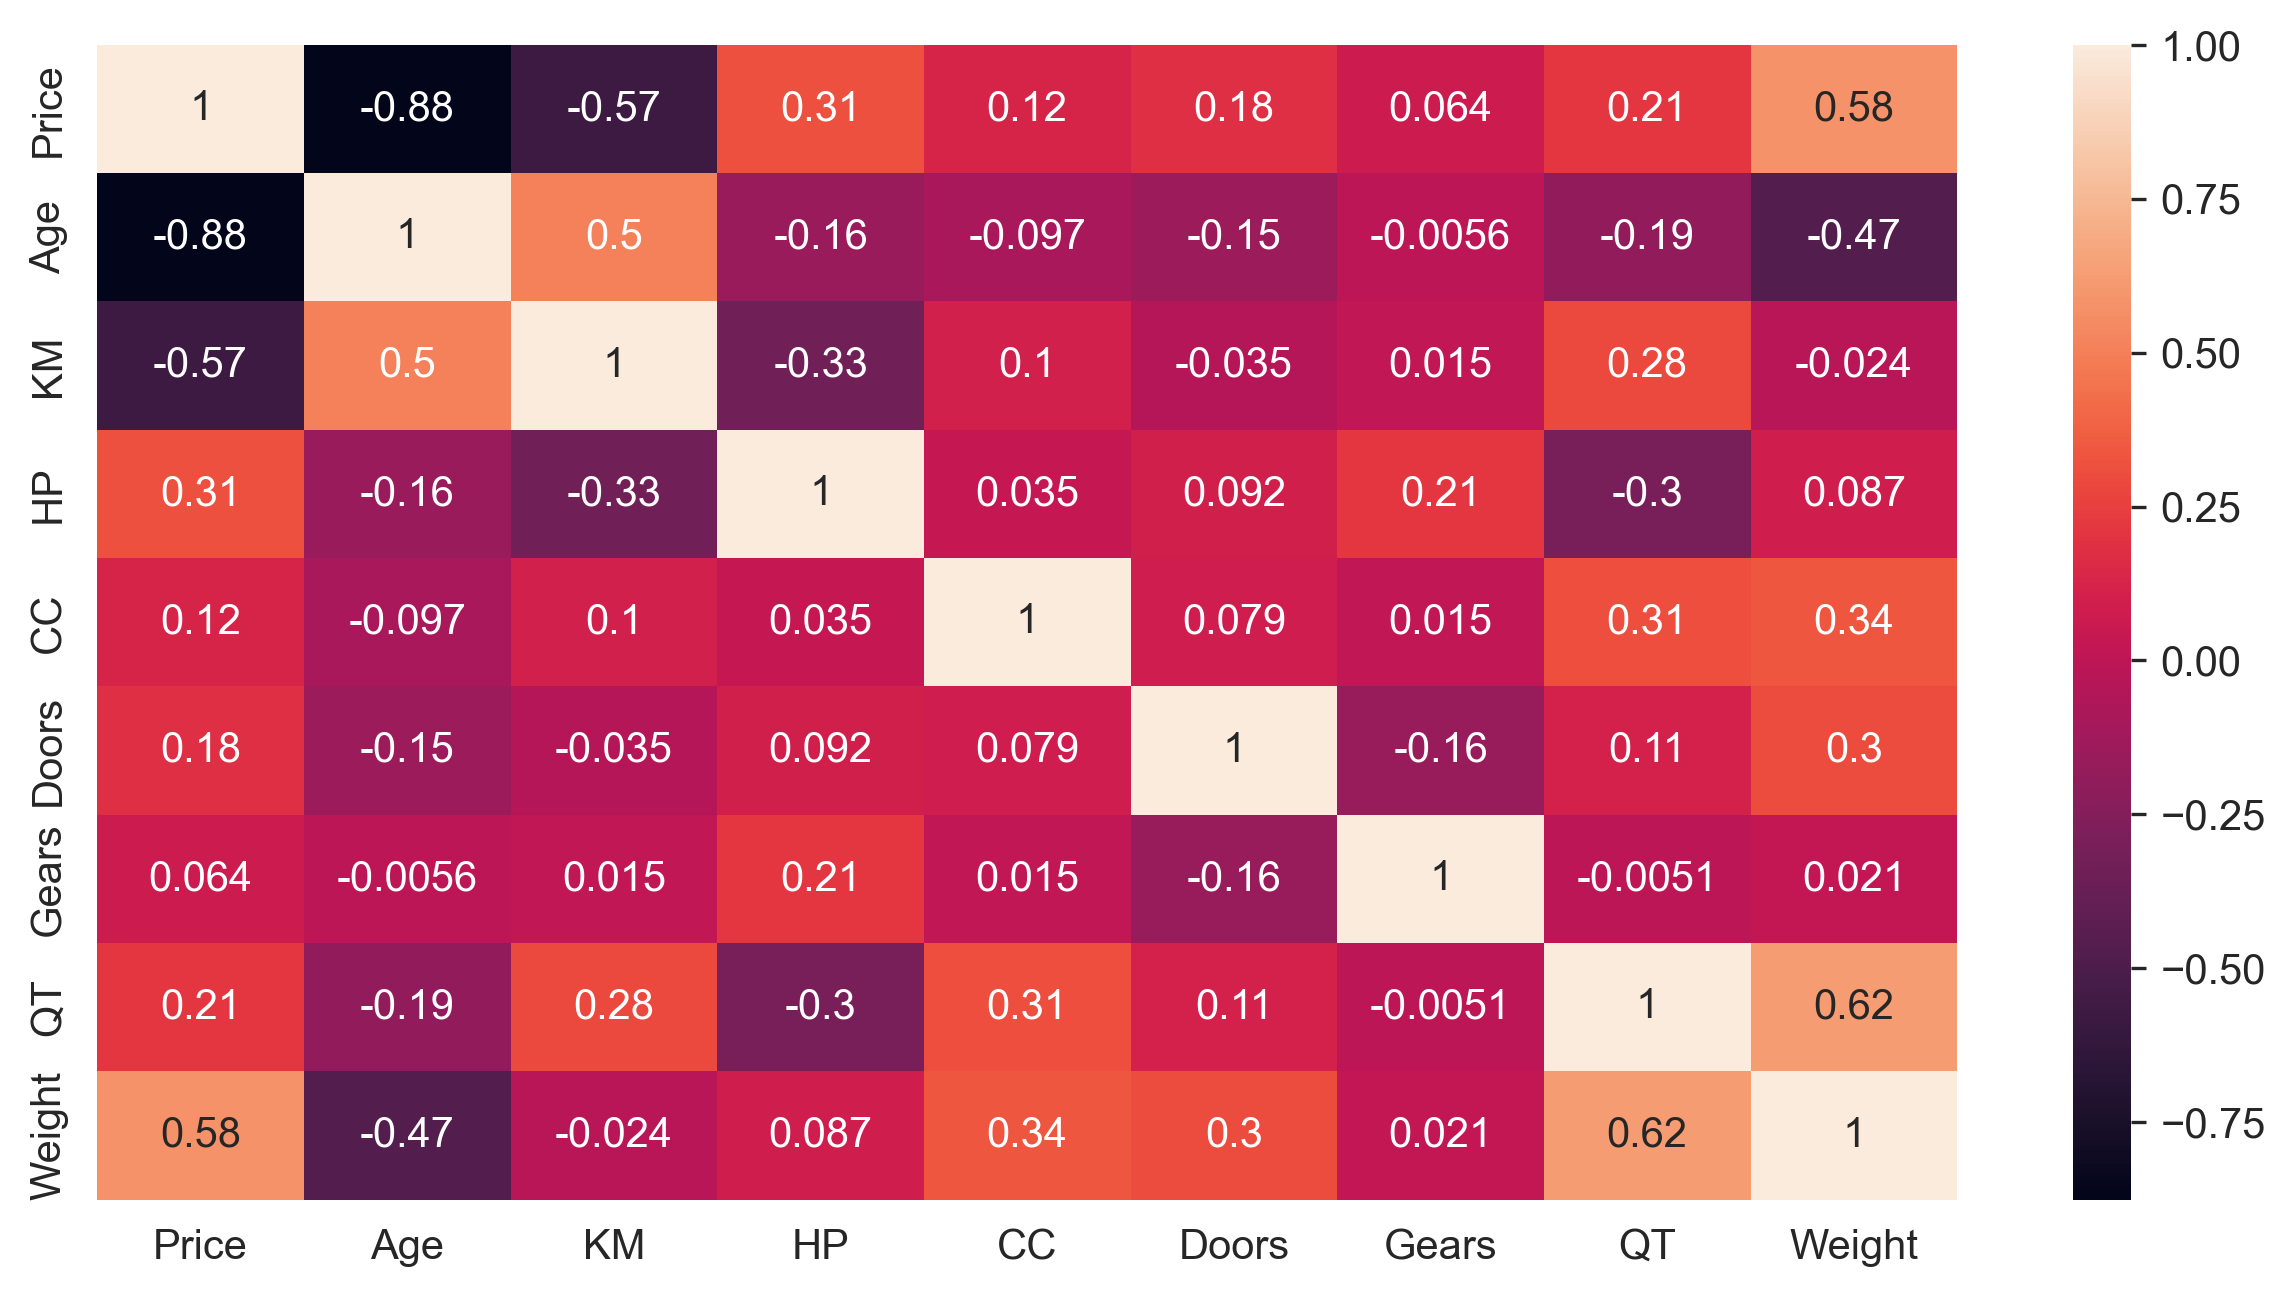

In [71]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [72]:
import statsmodels.formula.api as smf

In [73]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()

In [74]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [75]:
model.pvalues

Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64

# Finding rsquared values

In [76]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

# Calculate VIF

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
df.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [79]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df.values ,i) for i in range(len(df.columns))]

In [80]:
vif['Features'] = df.columns

In [81]:
vif

vif Features
0   70.770259    Price
1   46.662057      Age
2    9.005938       KM
3   71.361440       HP
4   17.201048       CC
5   21.856498    Doors
6  439.792421    Gears
7   11.187125       QT
8  668.038614   Weight

# Model Validation Techniques

In [82]:
import statsmodels.api as sm

In [83]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

# Q-Q Plot

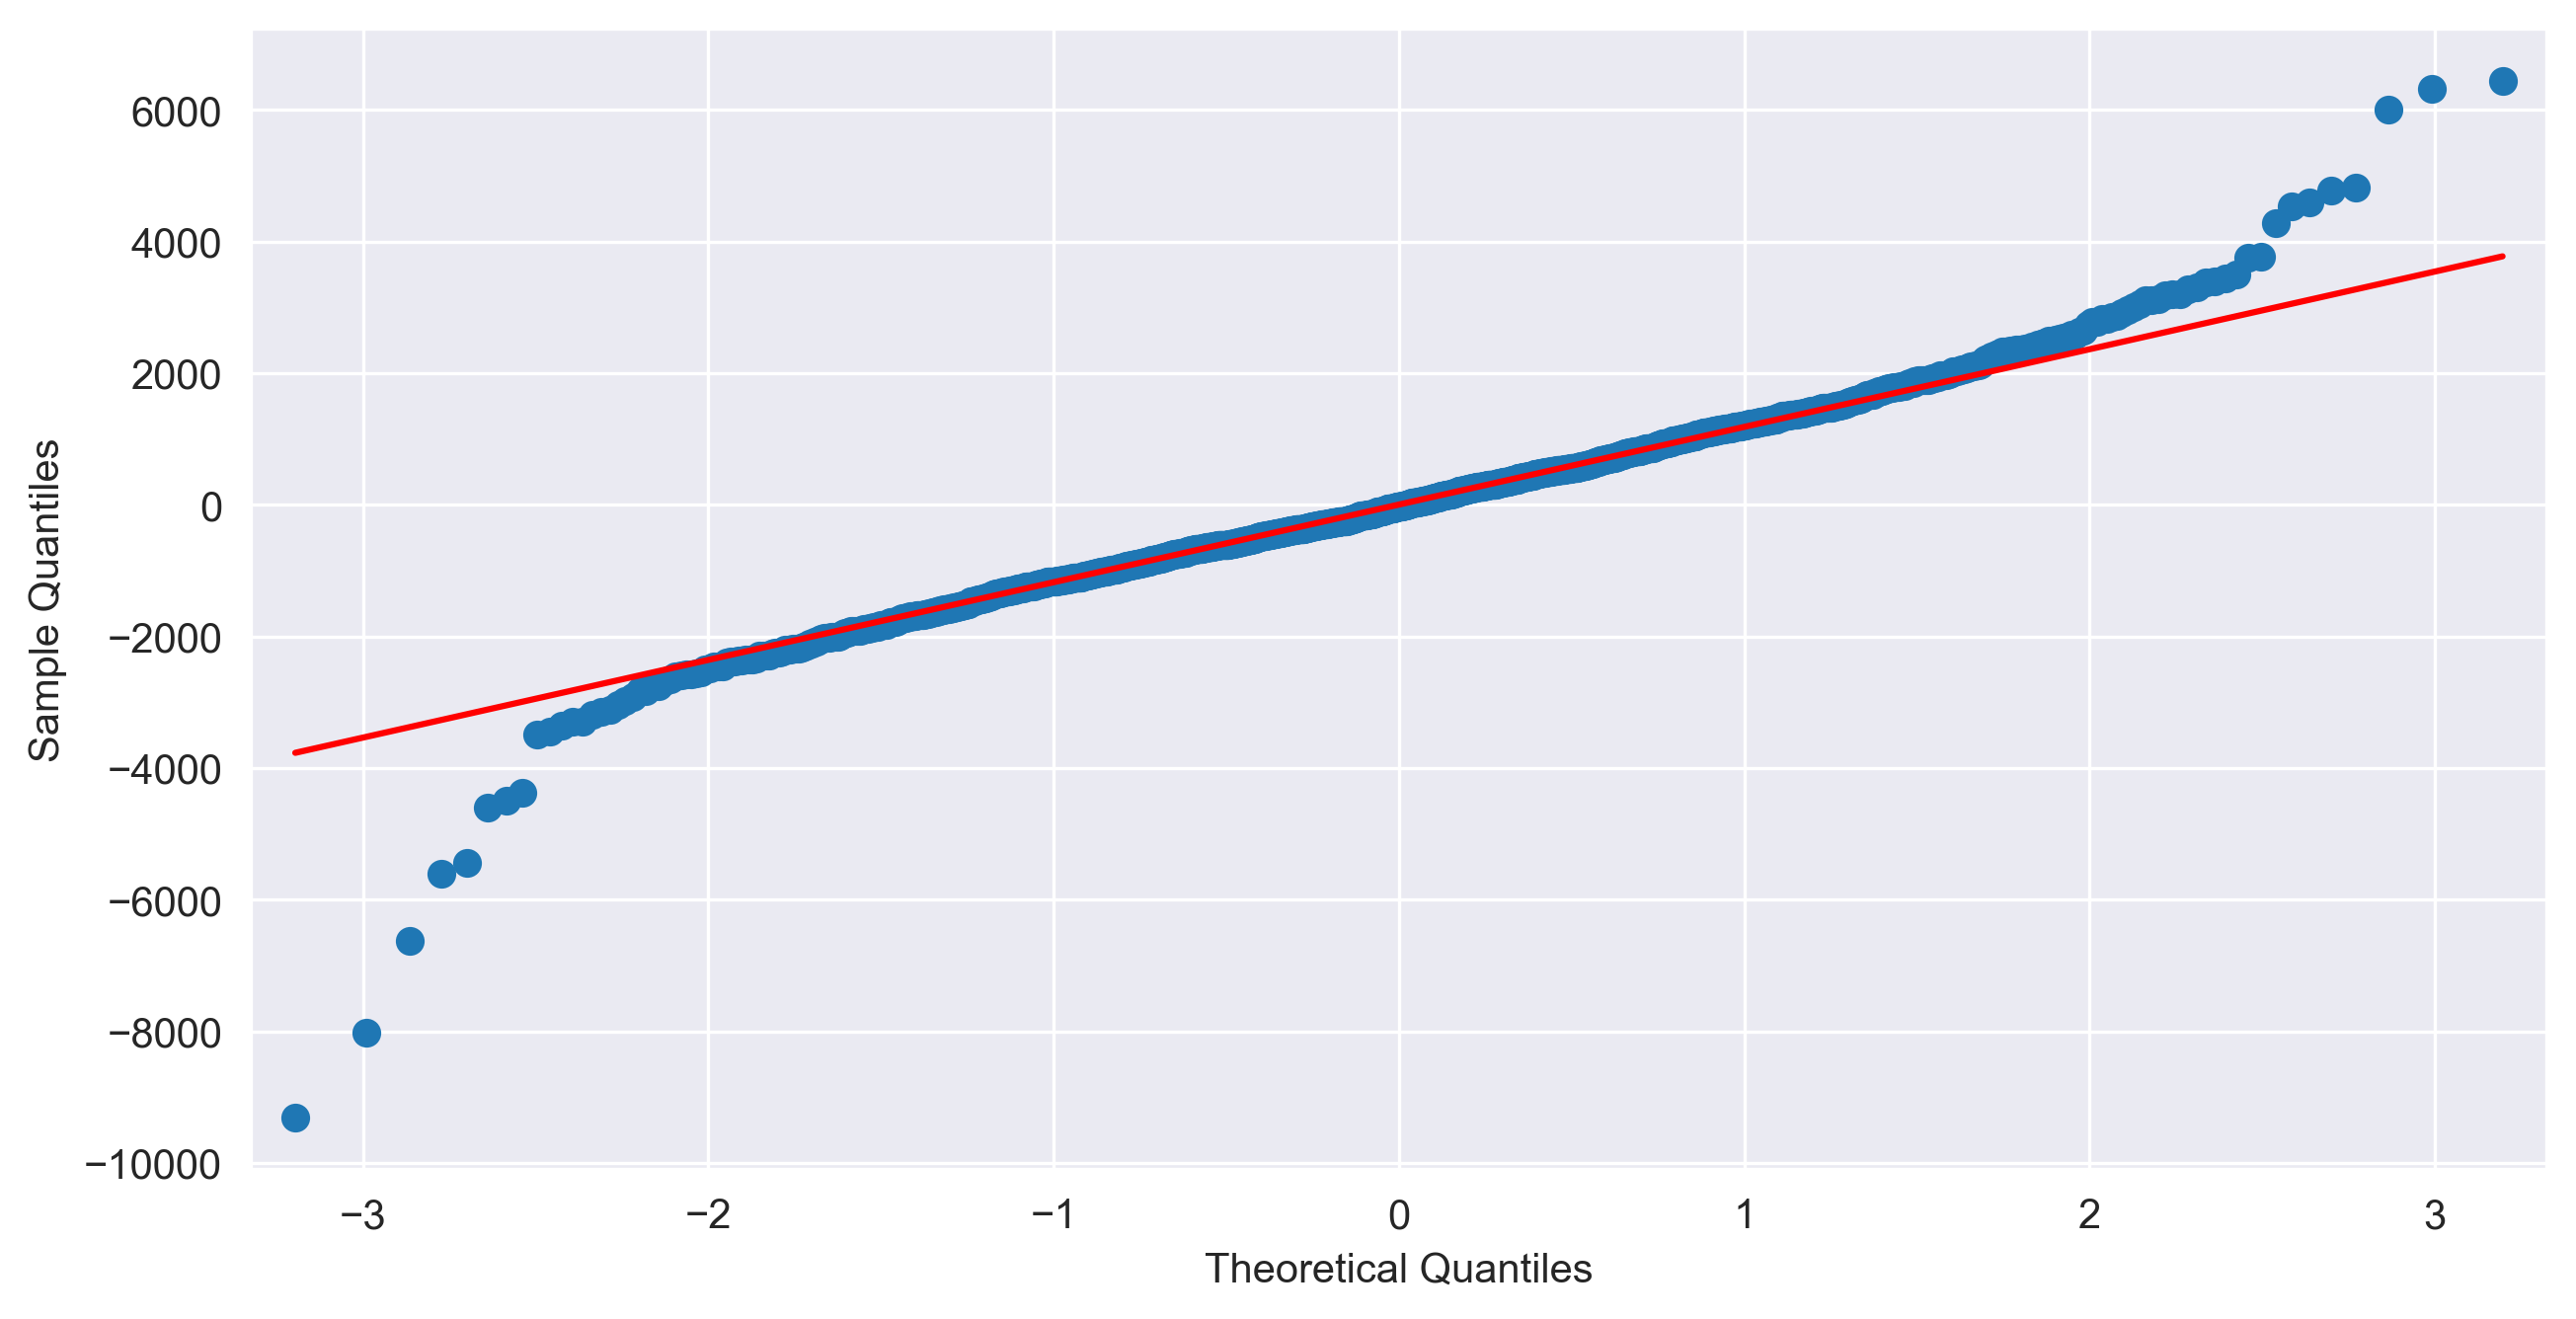

In [84]:
sm.qqplot(model.resid,line = 'q');

In [85]:
# get index for higher and lower residual

In [86]:
np.where(model.resid>5000)

(array([109, 146, 522], dtype=int64),)

In [87]:
np.where(model.resid<-6000)

(array([220, 600, 959], dtype=int64),)

#  Residual plot of Homoscedasticity¶

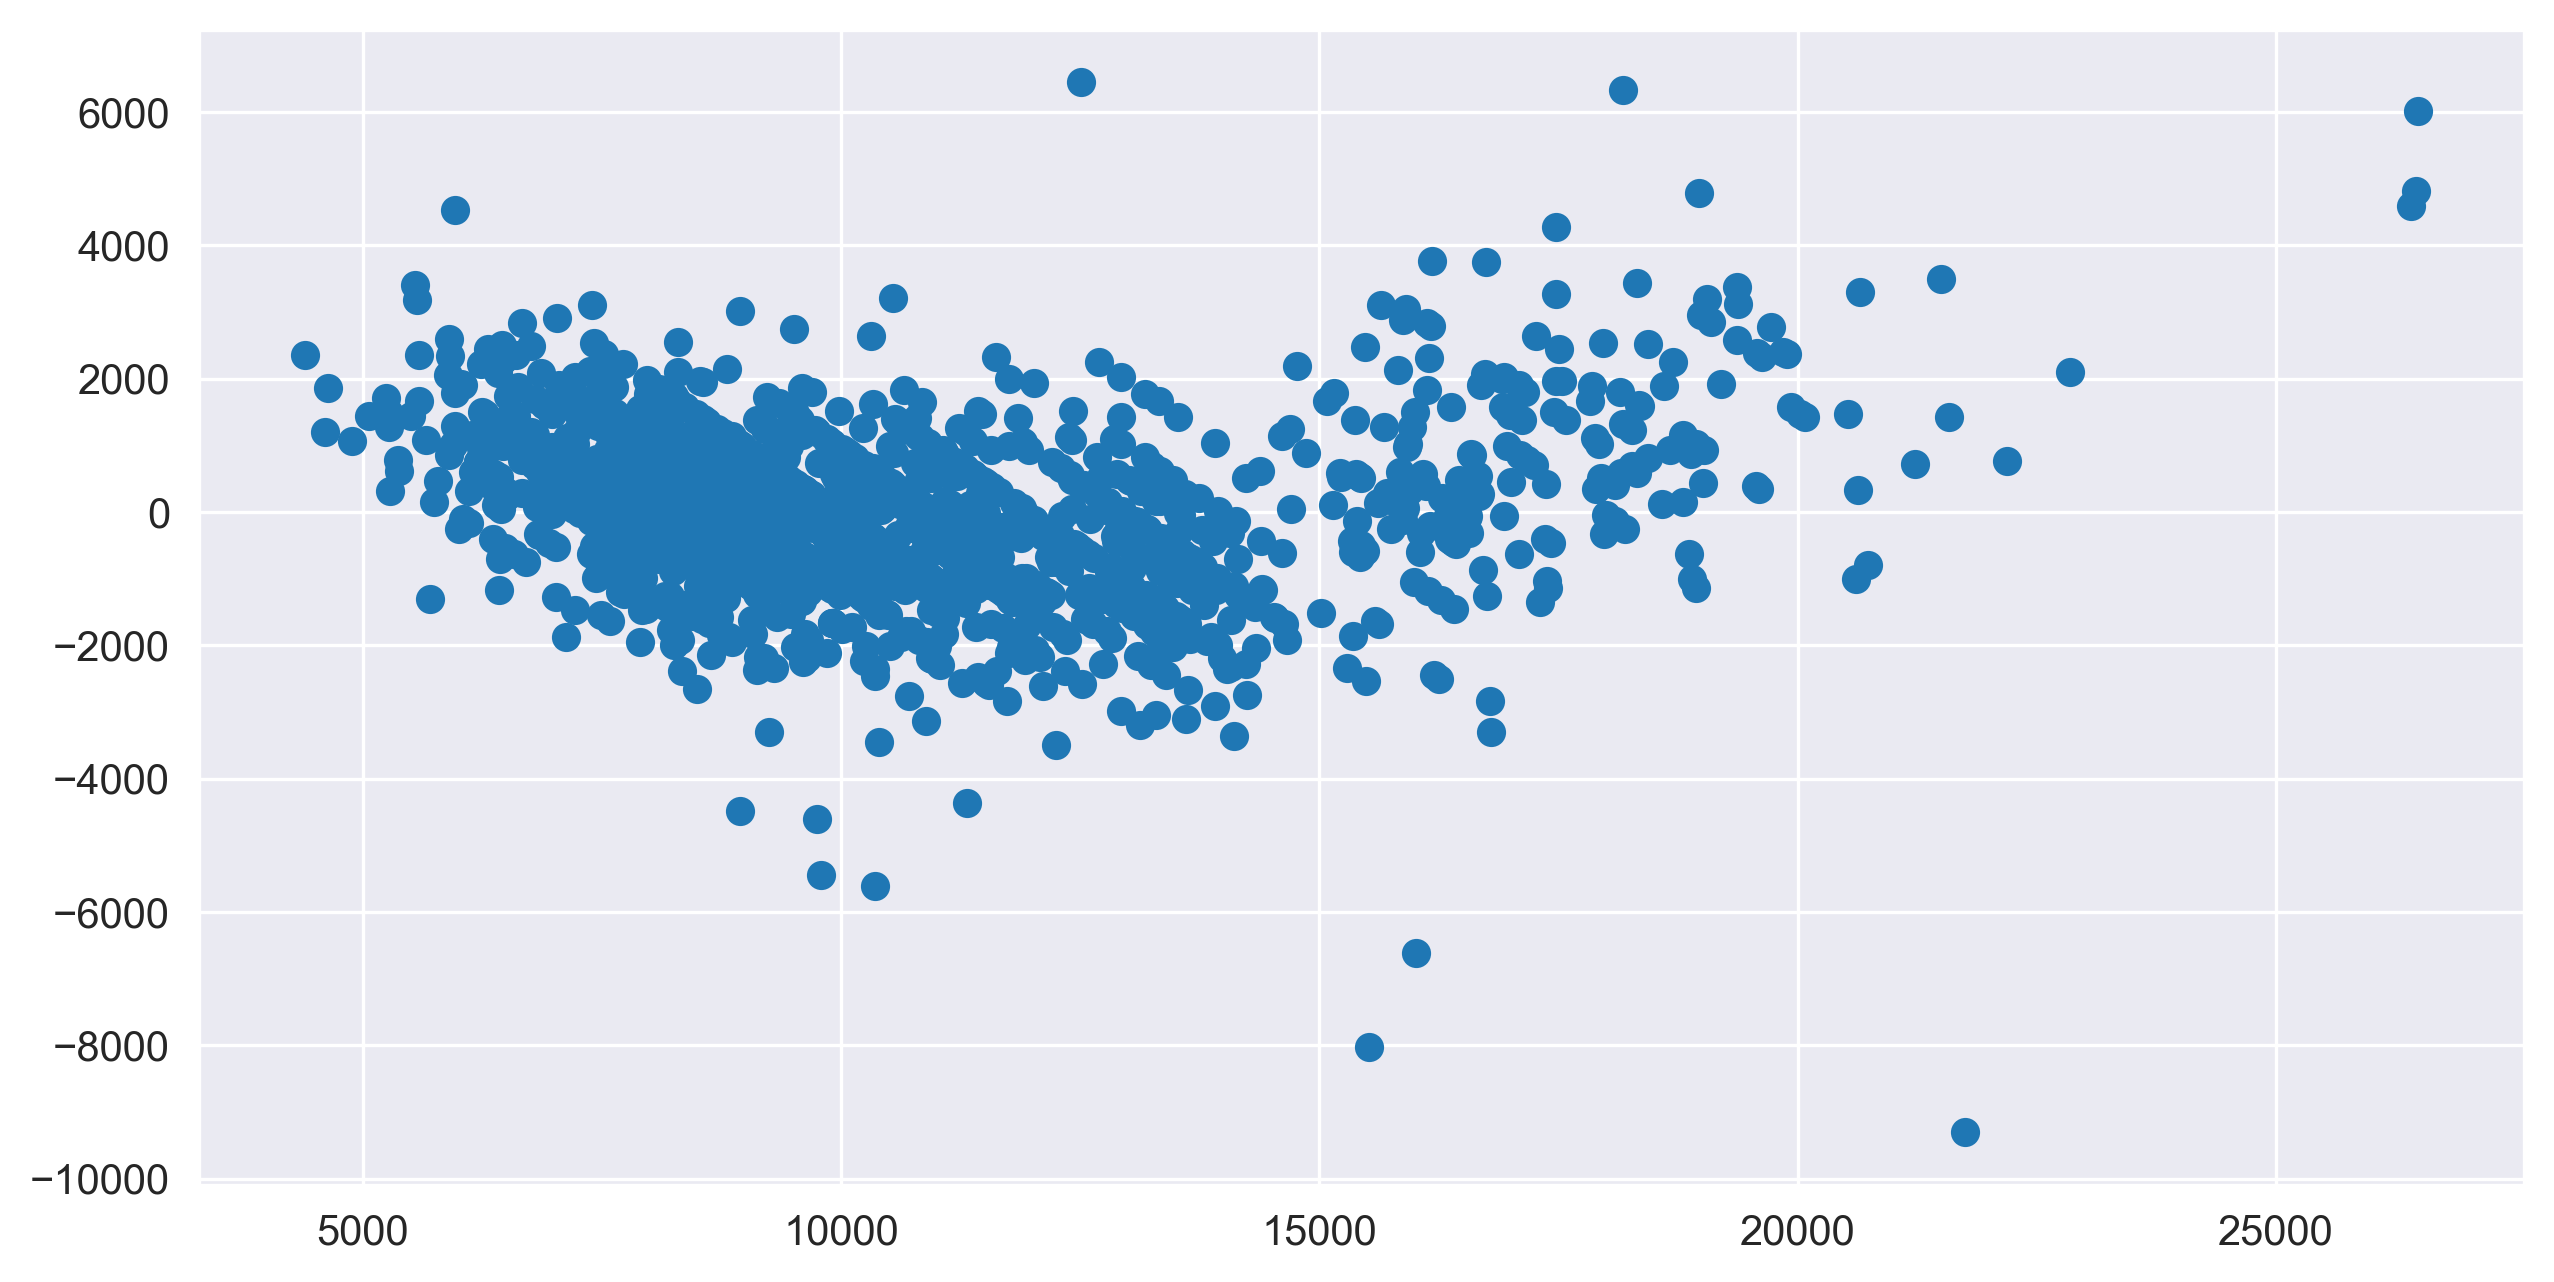

In [90]:
plt.scatter(model.fittedvalues,model.resid);

# Residual VS Regressor

eval_env: 1


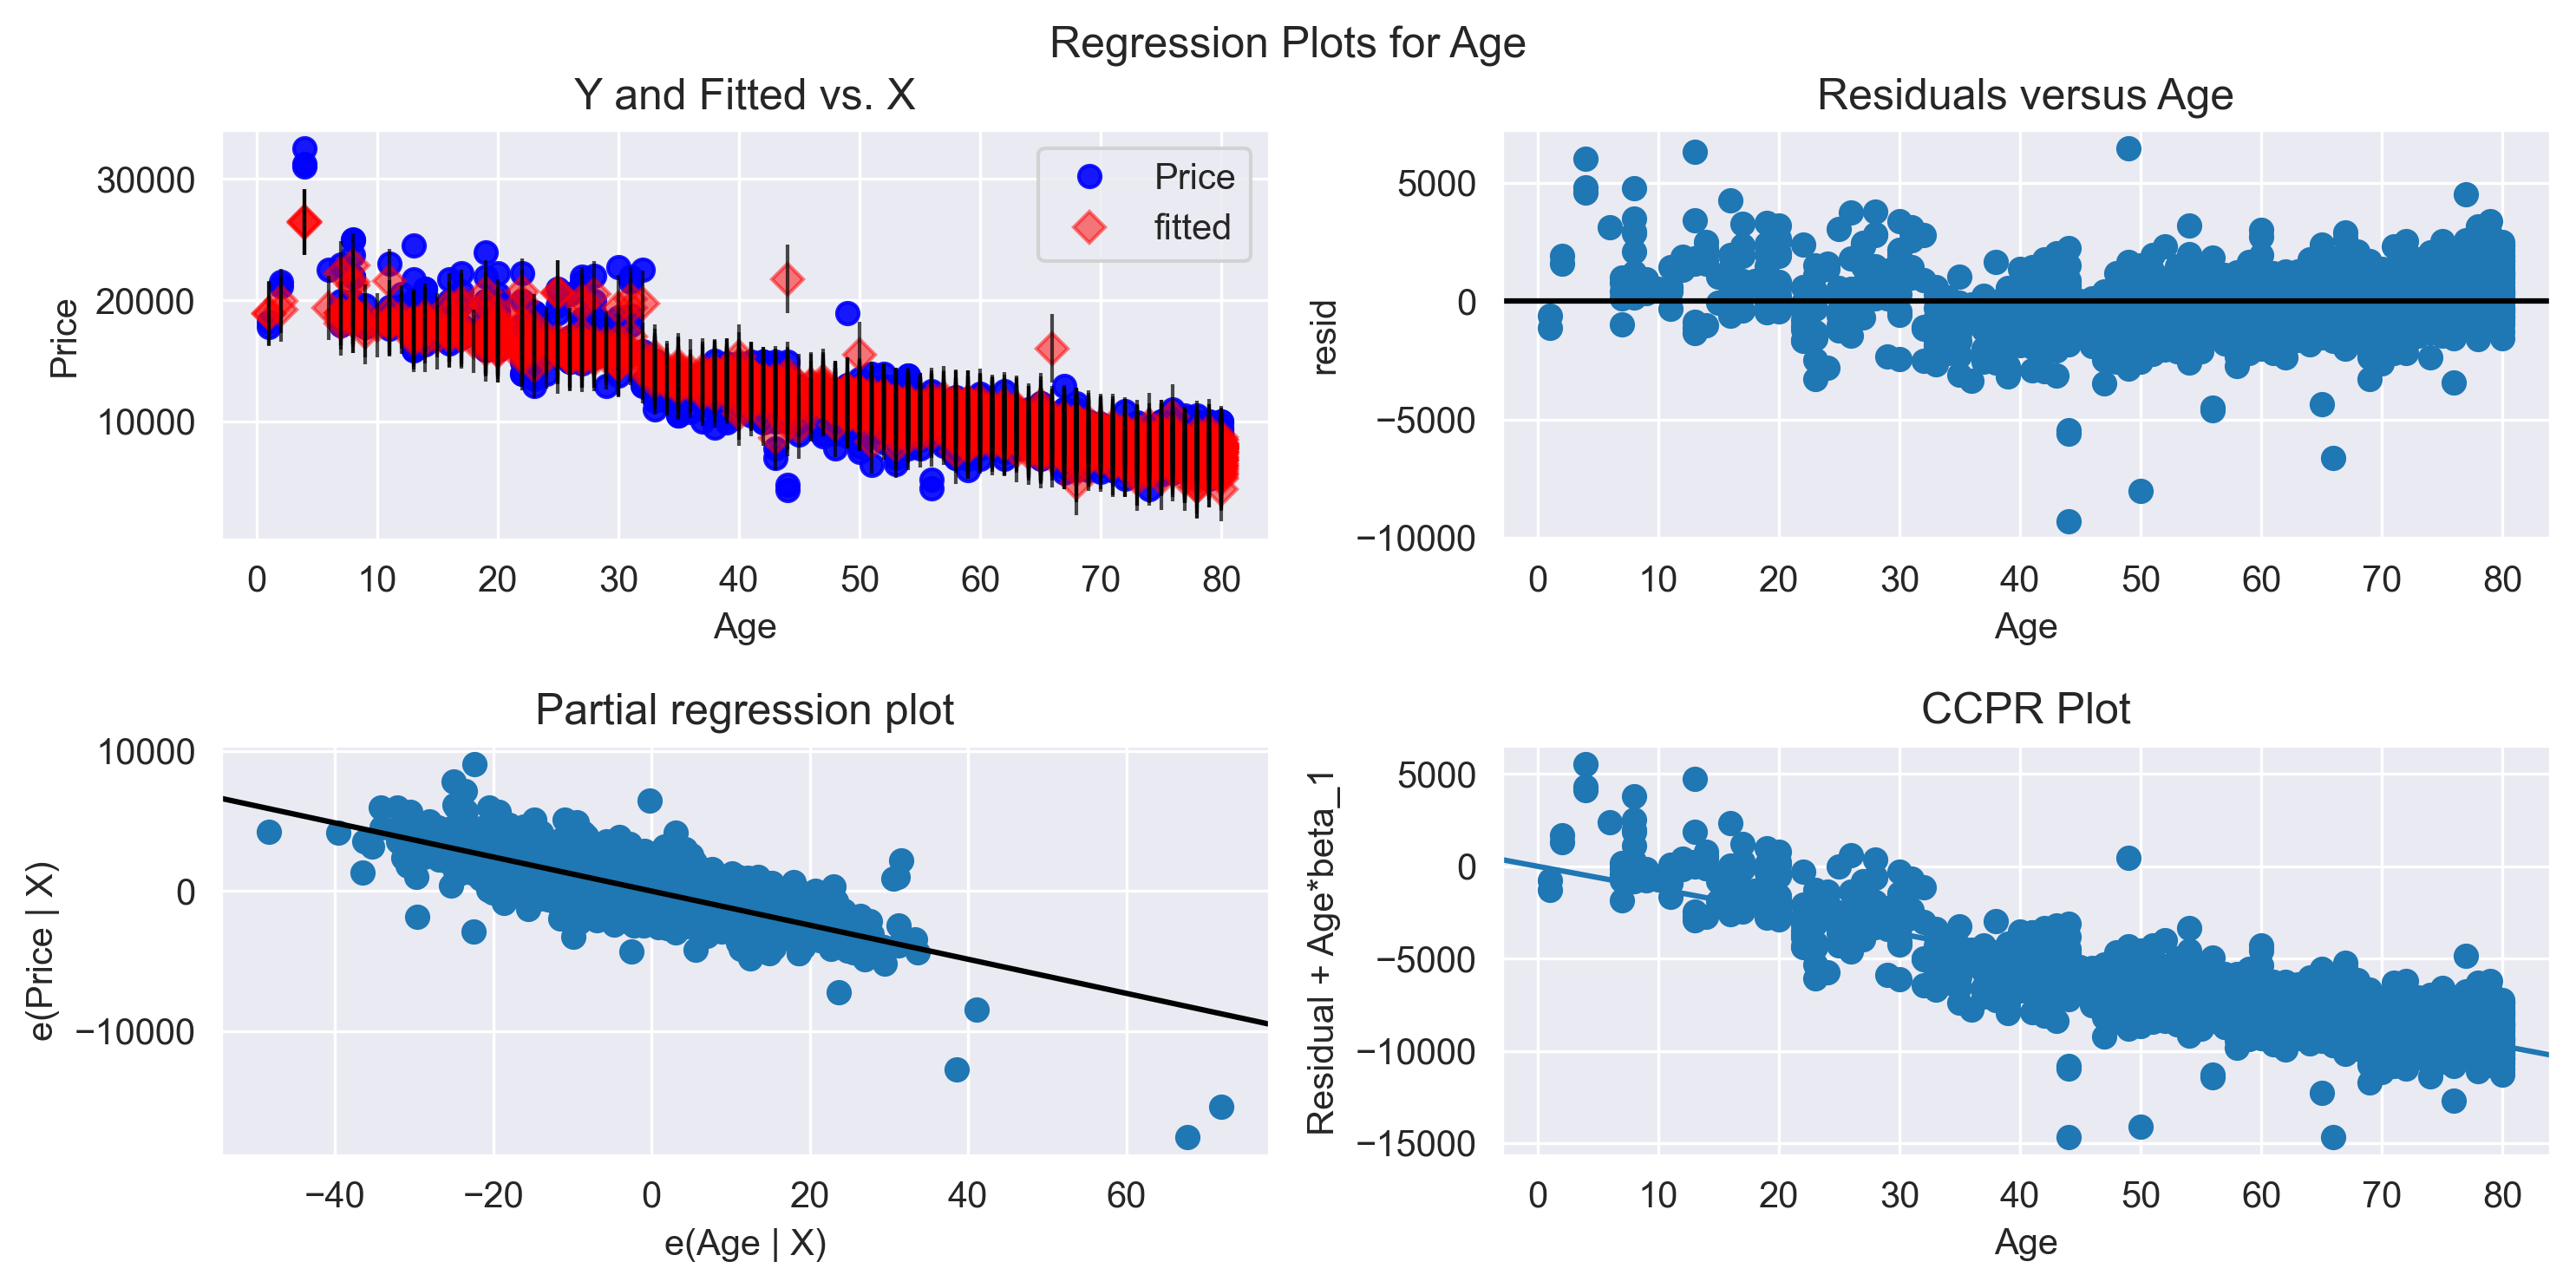

In [91]:
sm.graphics.plot_regress_exog(model,'Age');

eval_env: 1


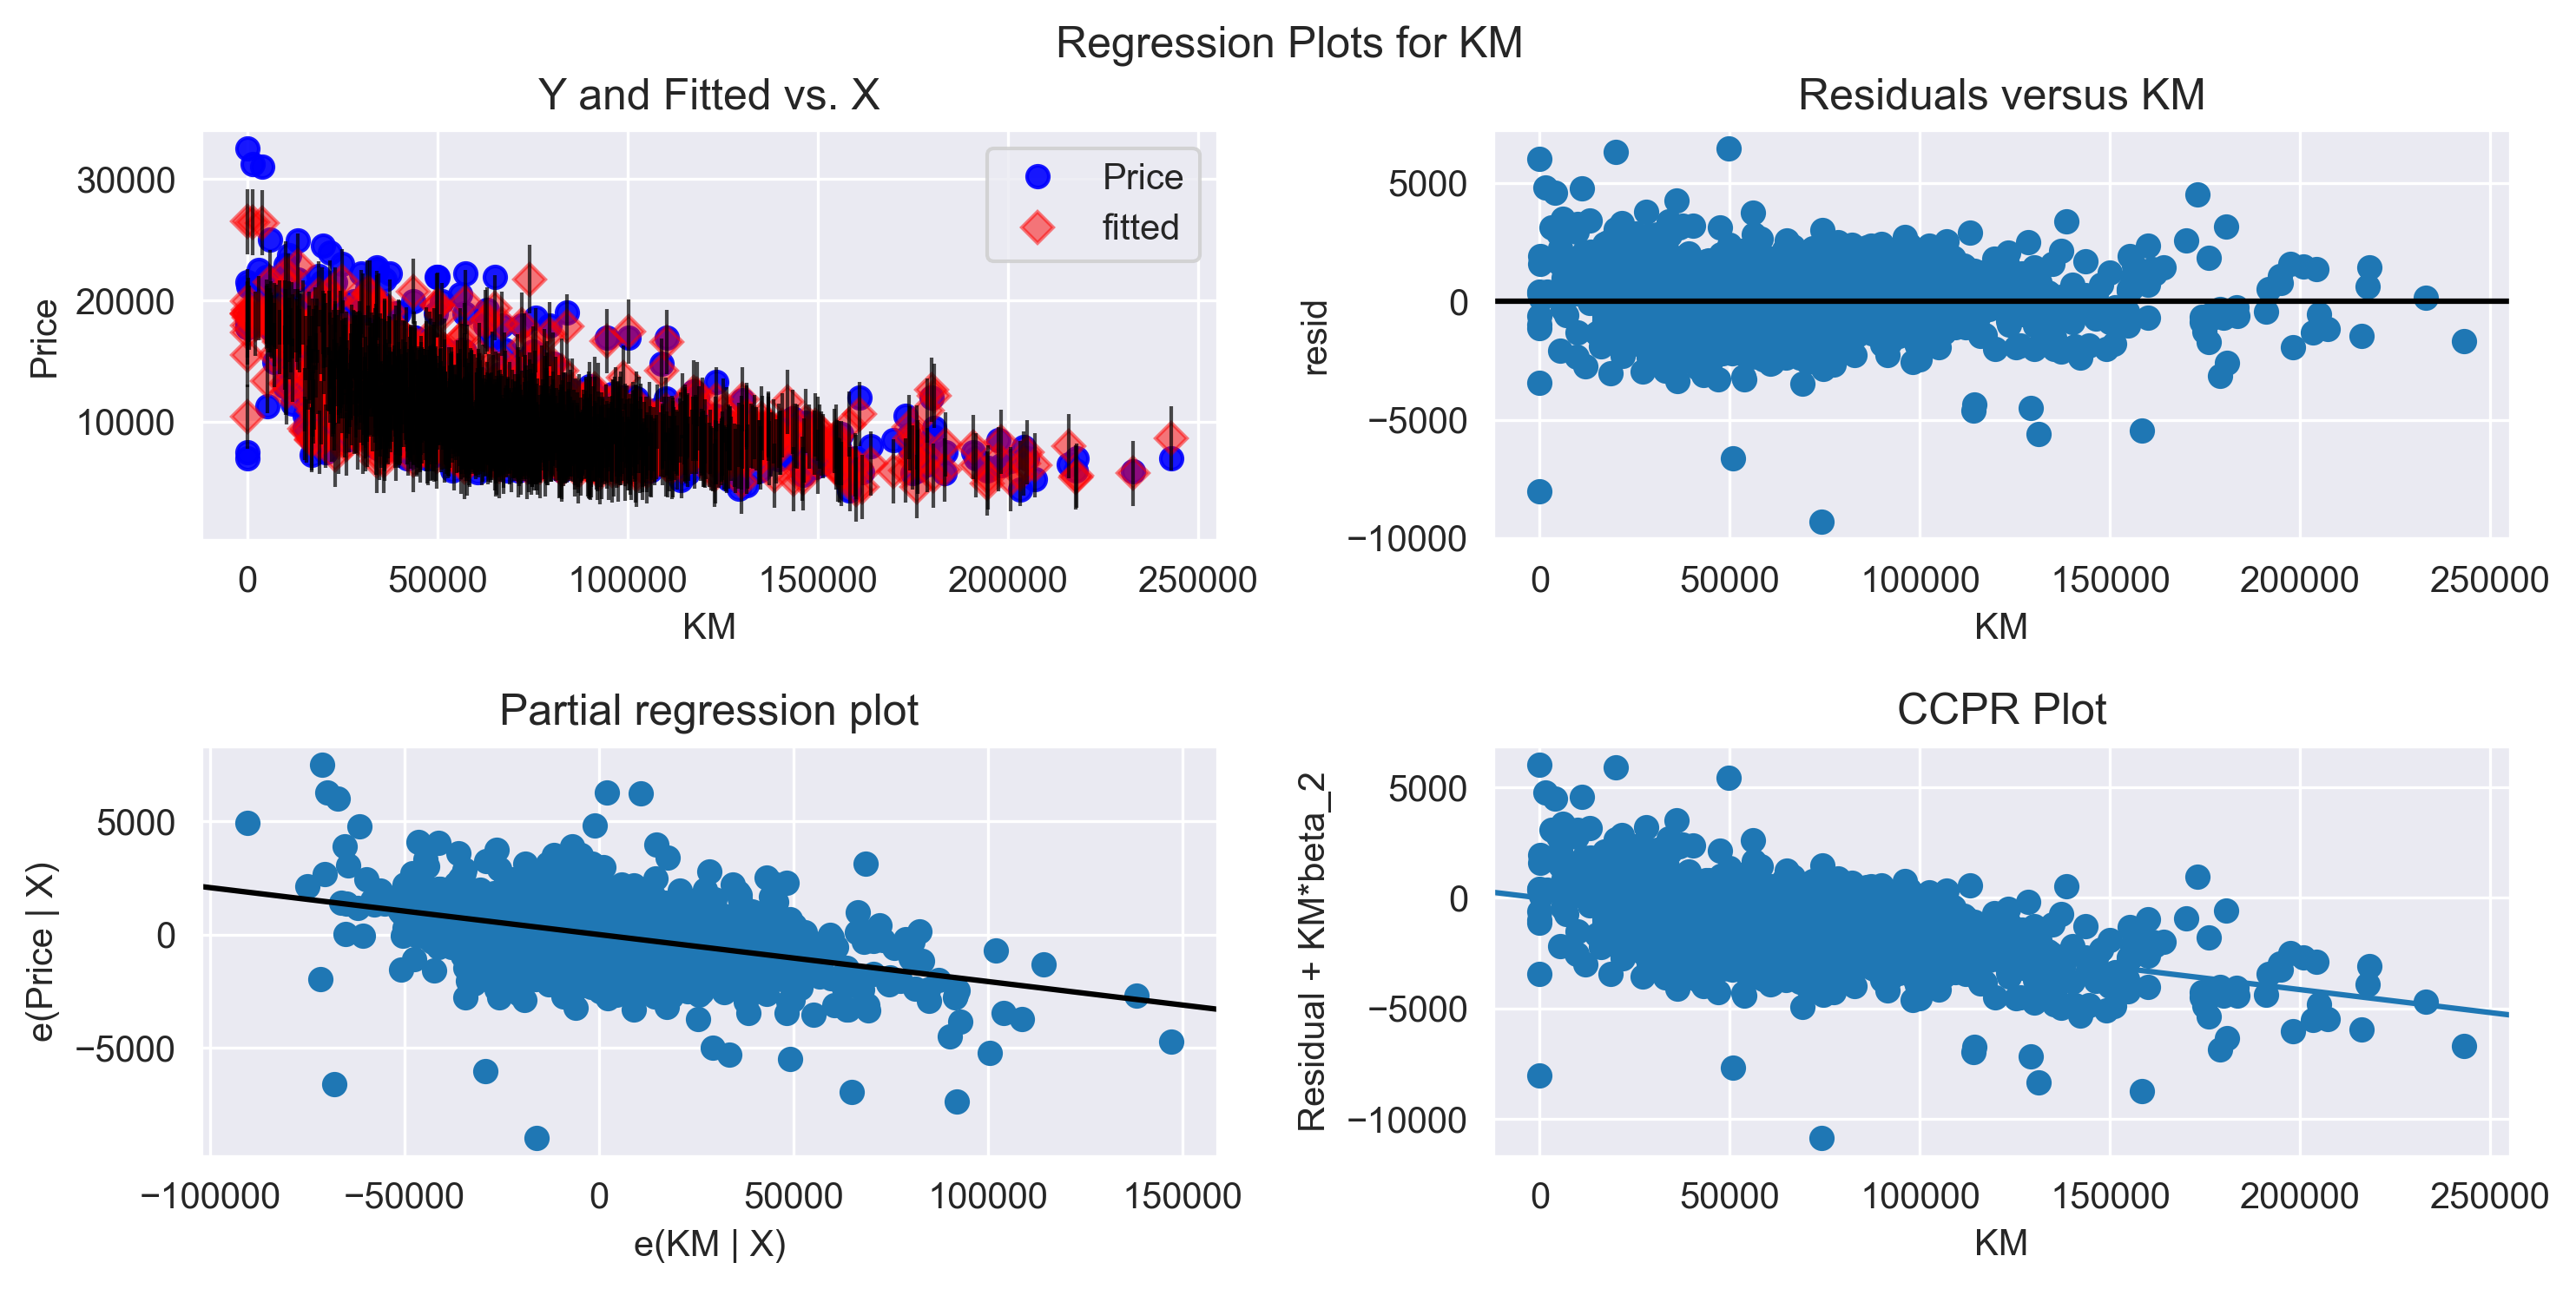

In [92]:
sm.graphics.plot_regress_exog(model,'KM');

eval_env: 1


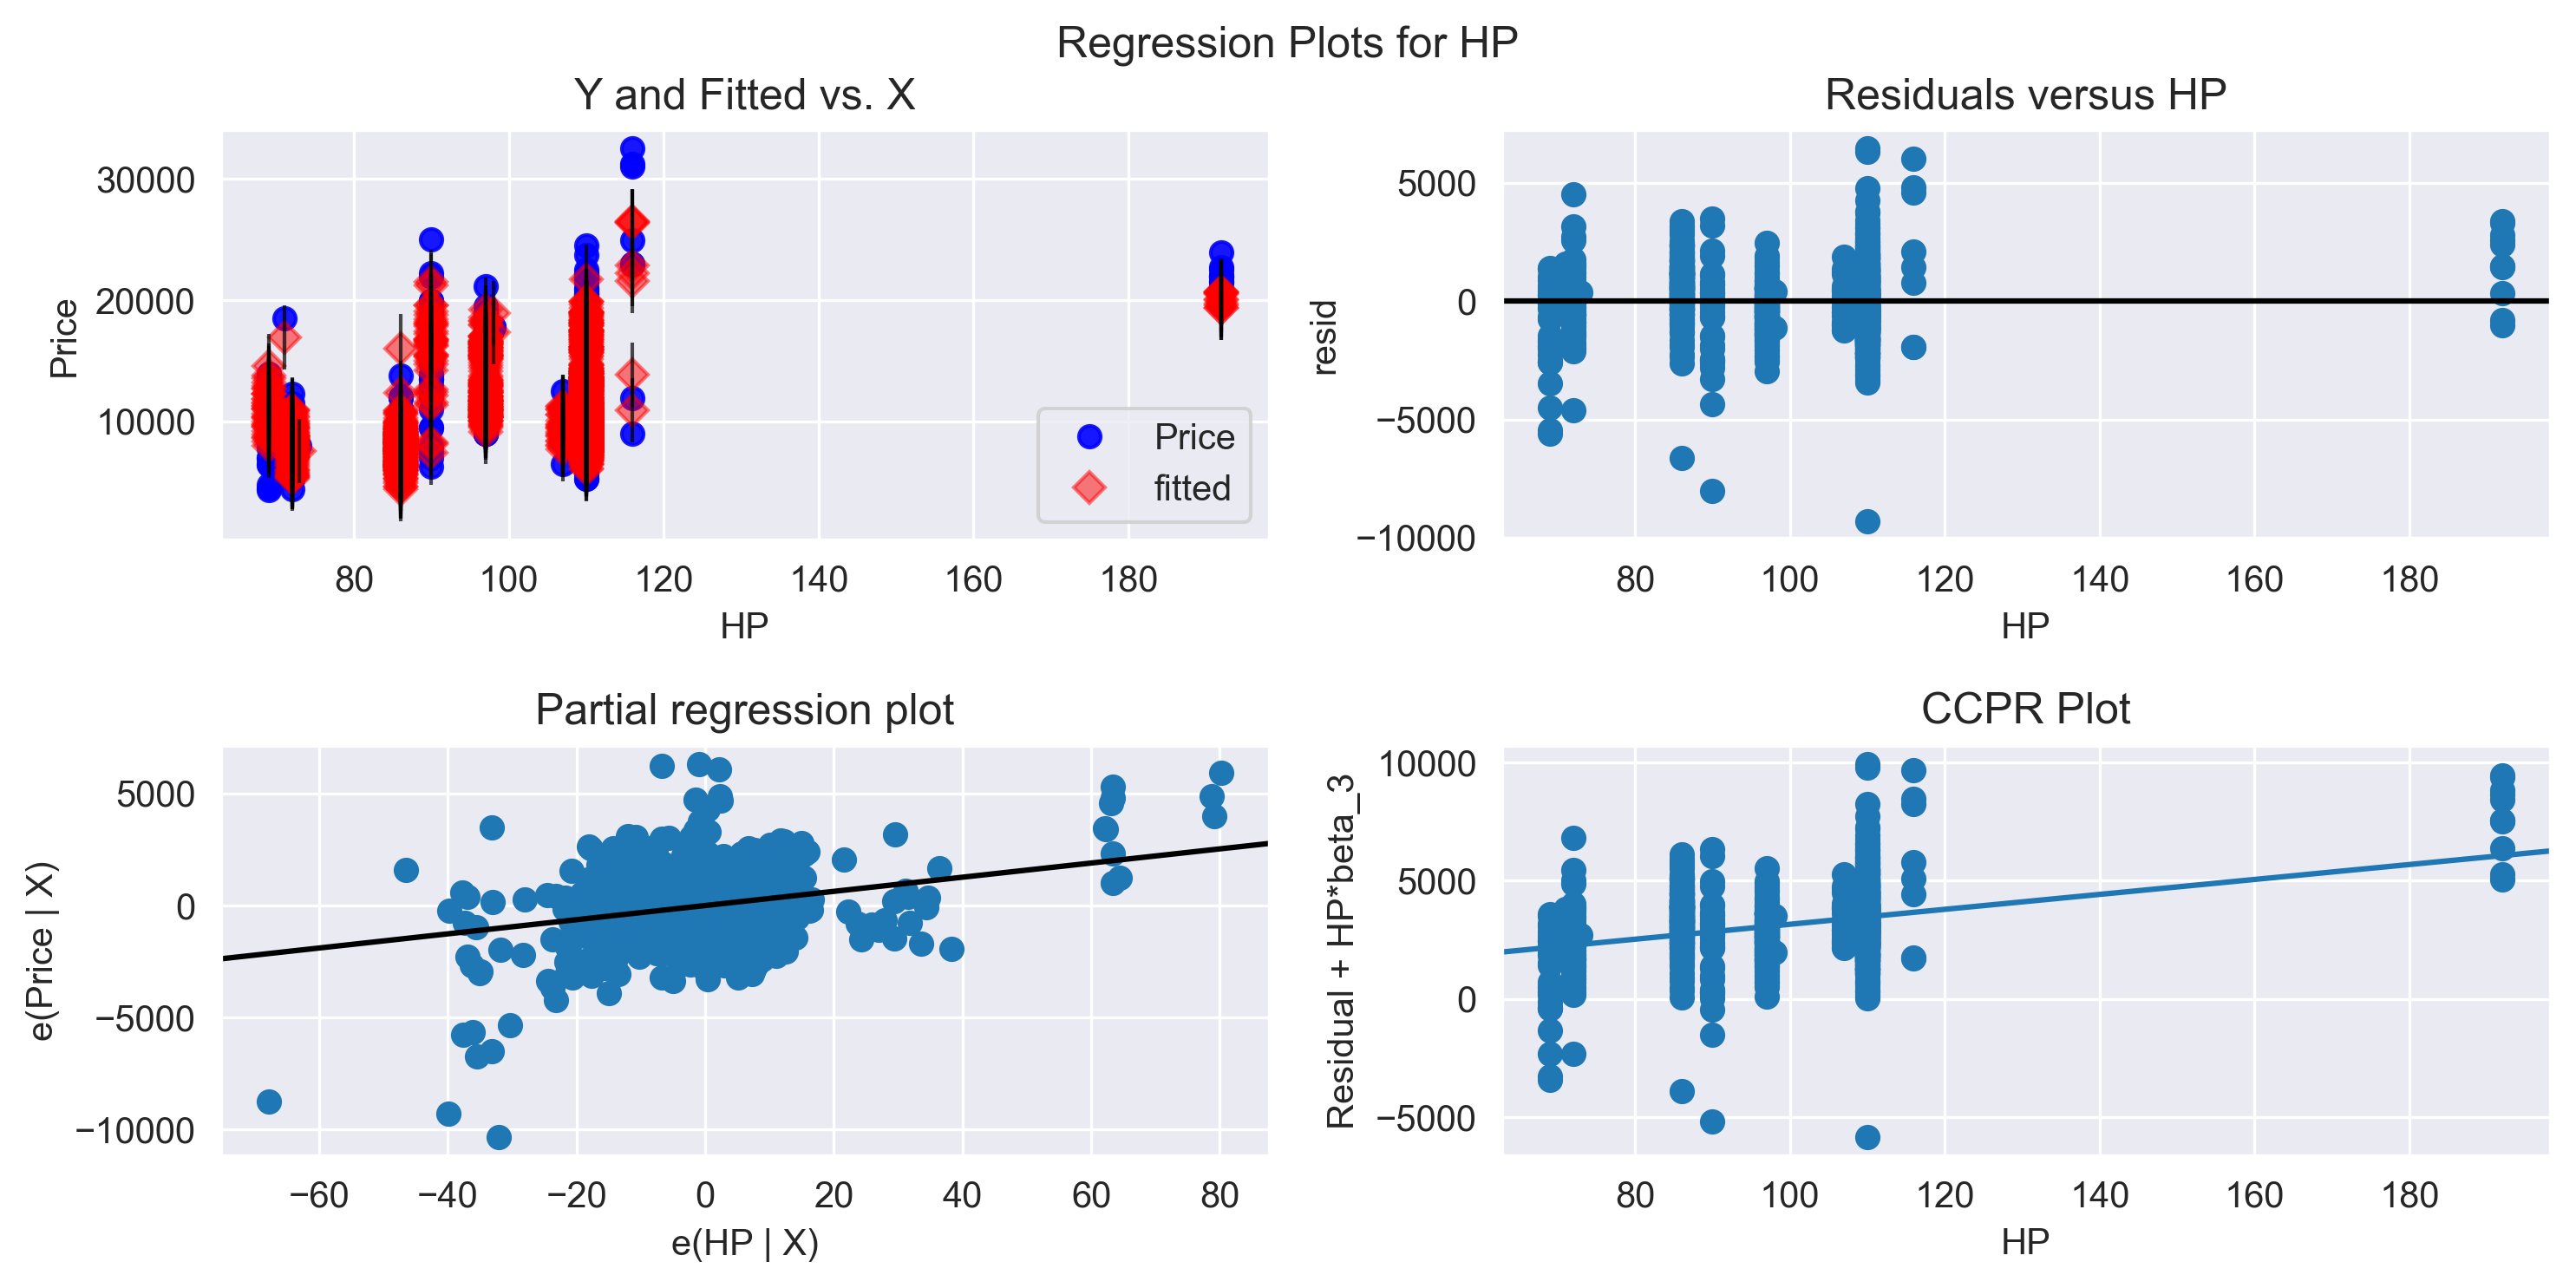

In [93]:
sm.graphics.plot_regress_exog(model,'HP');

eval_env: 1


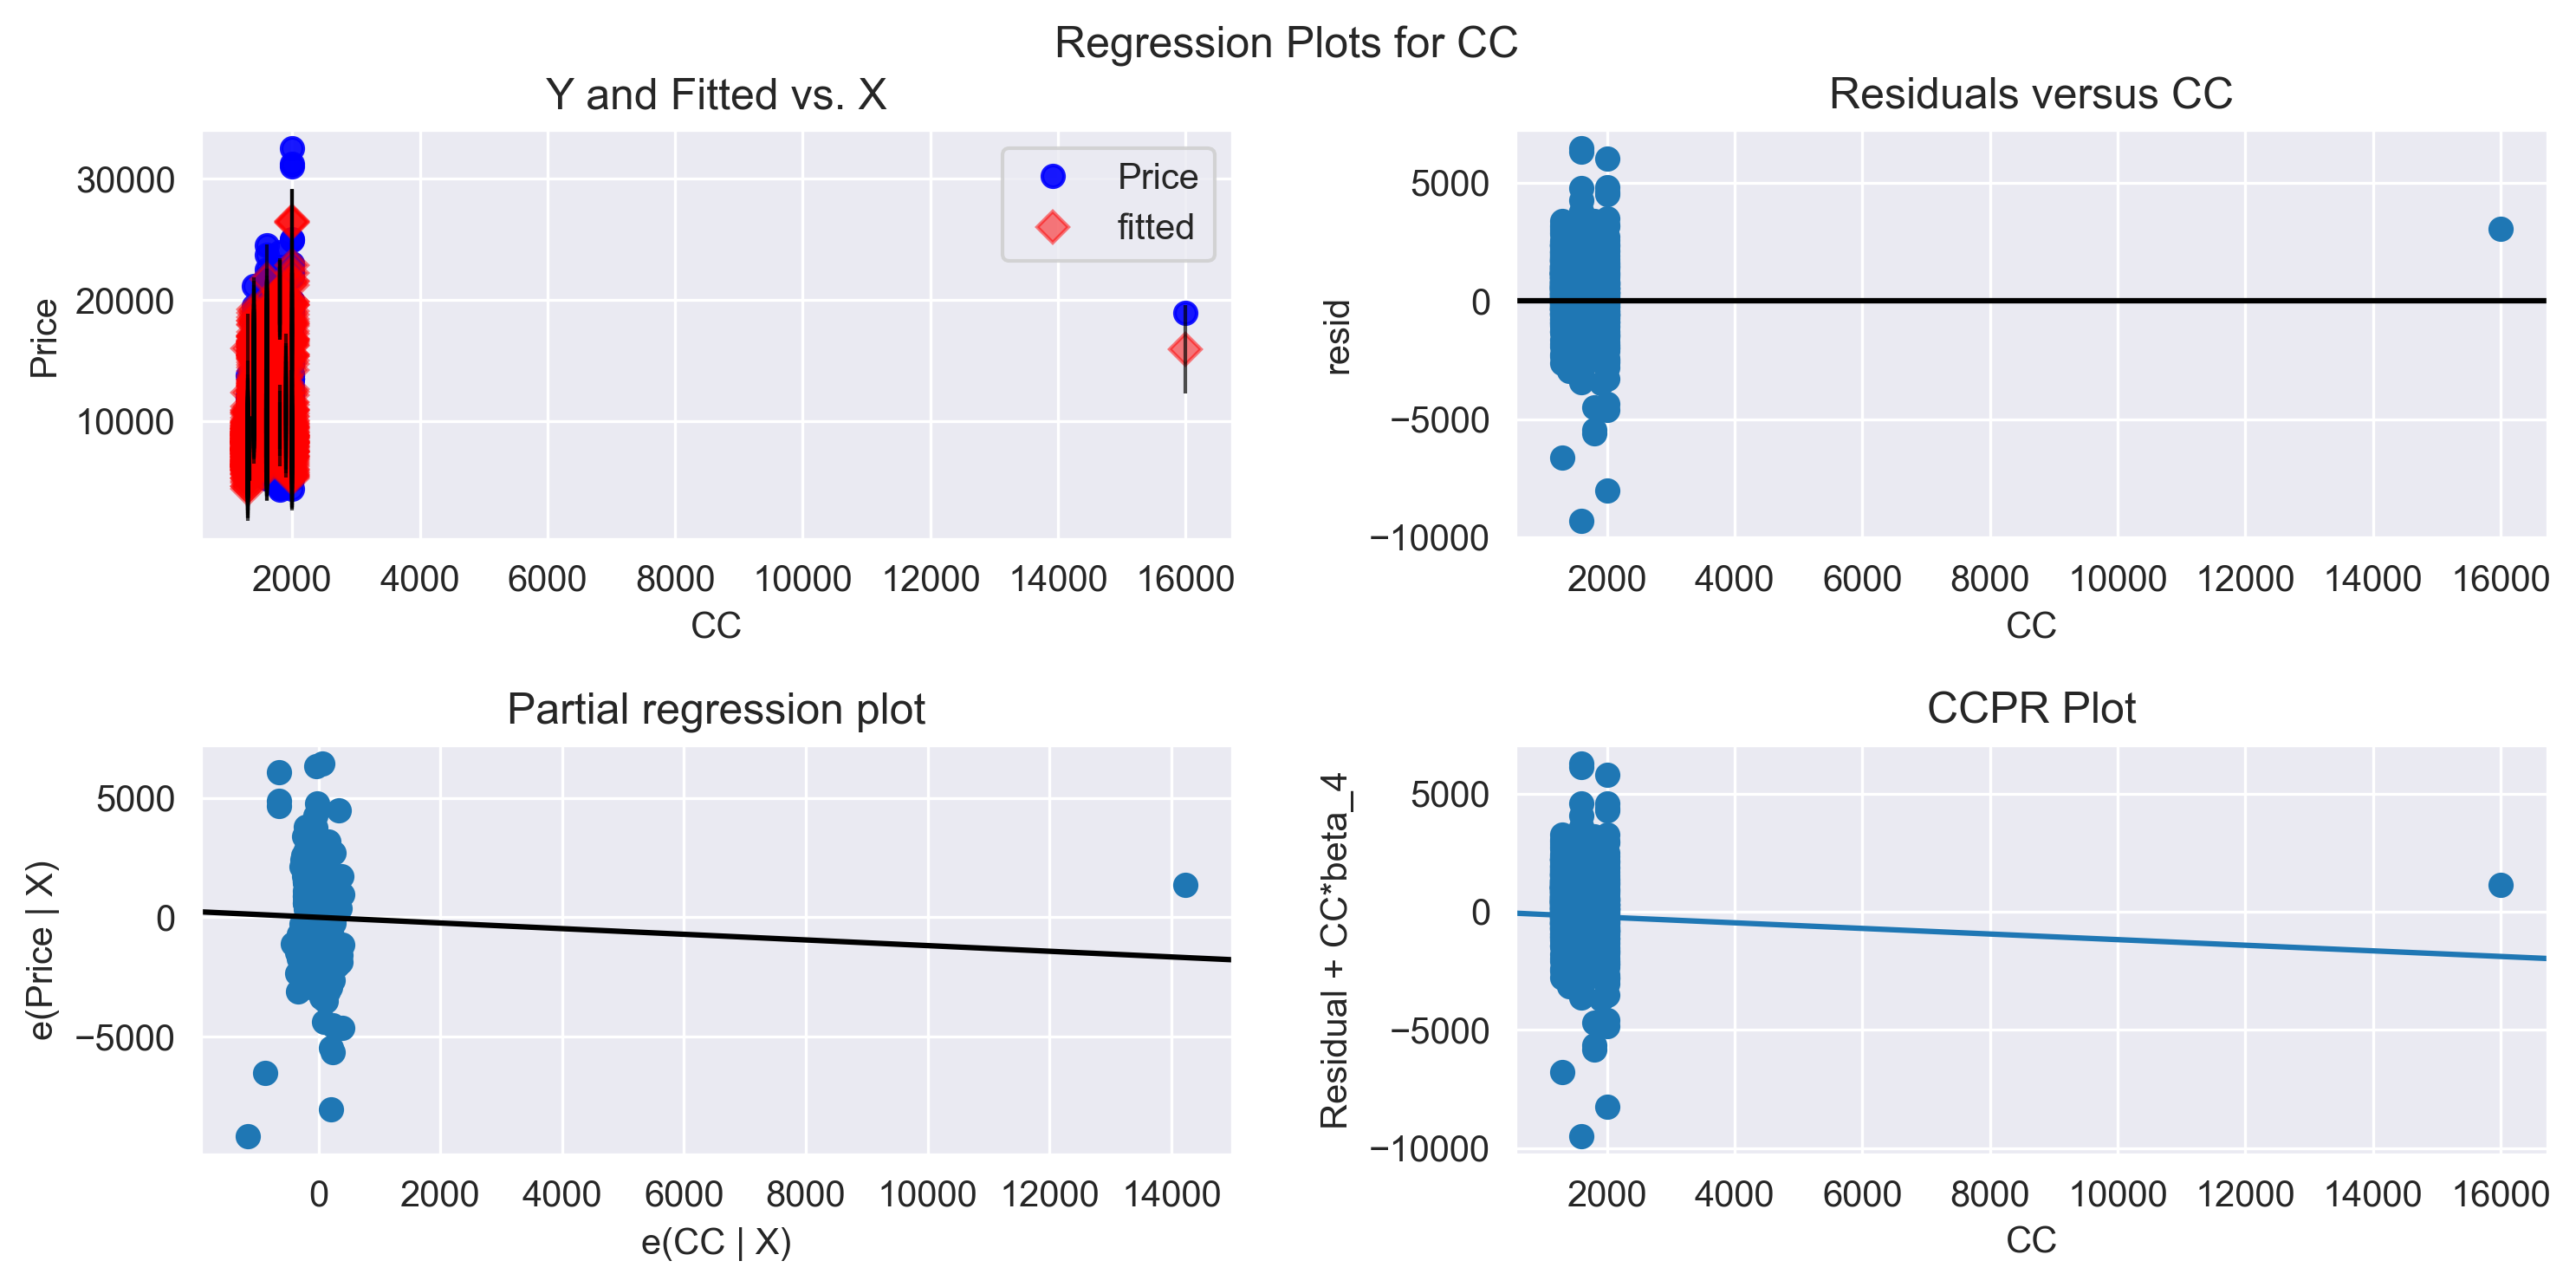

In [94]:
sm.graphics.plot_regress_exog(model,'CC');

eval_env: 1


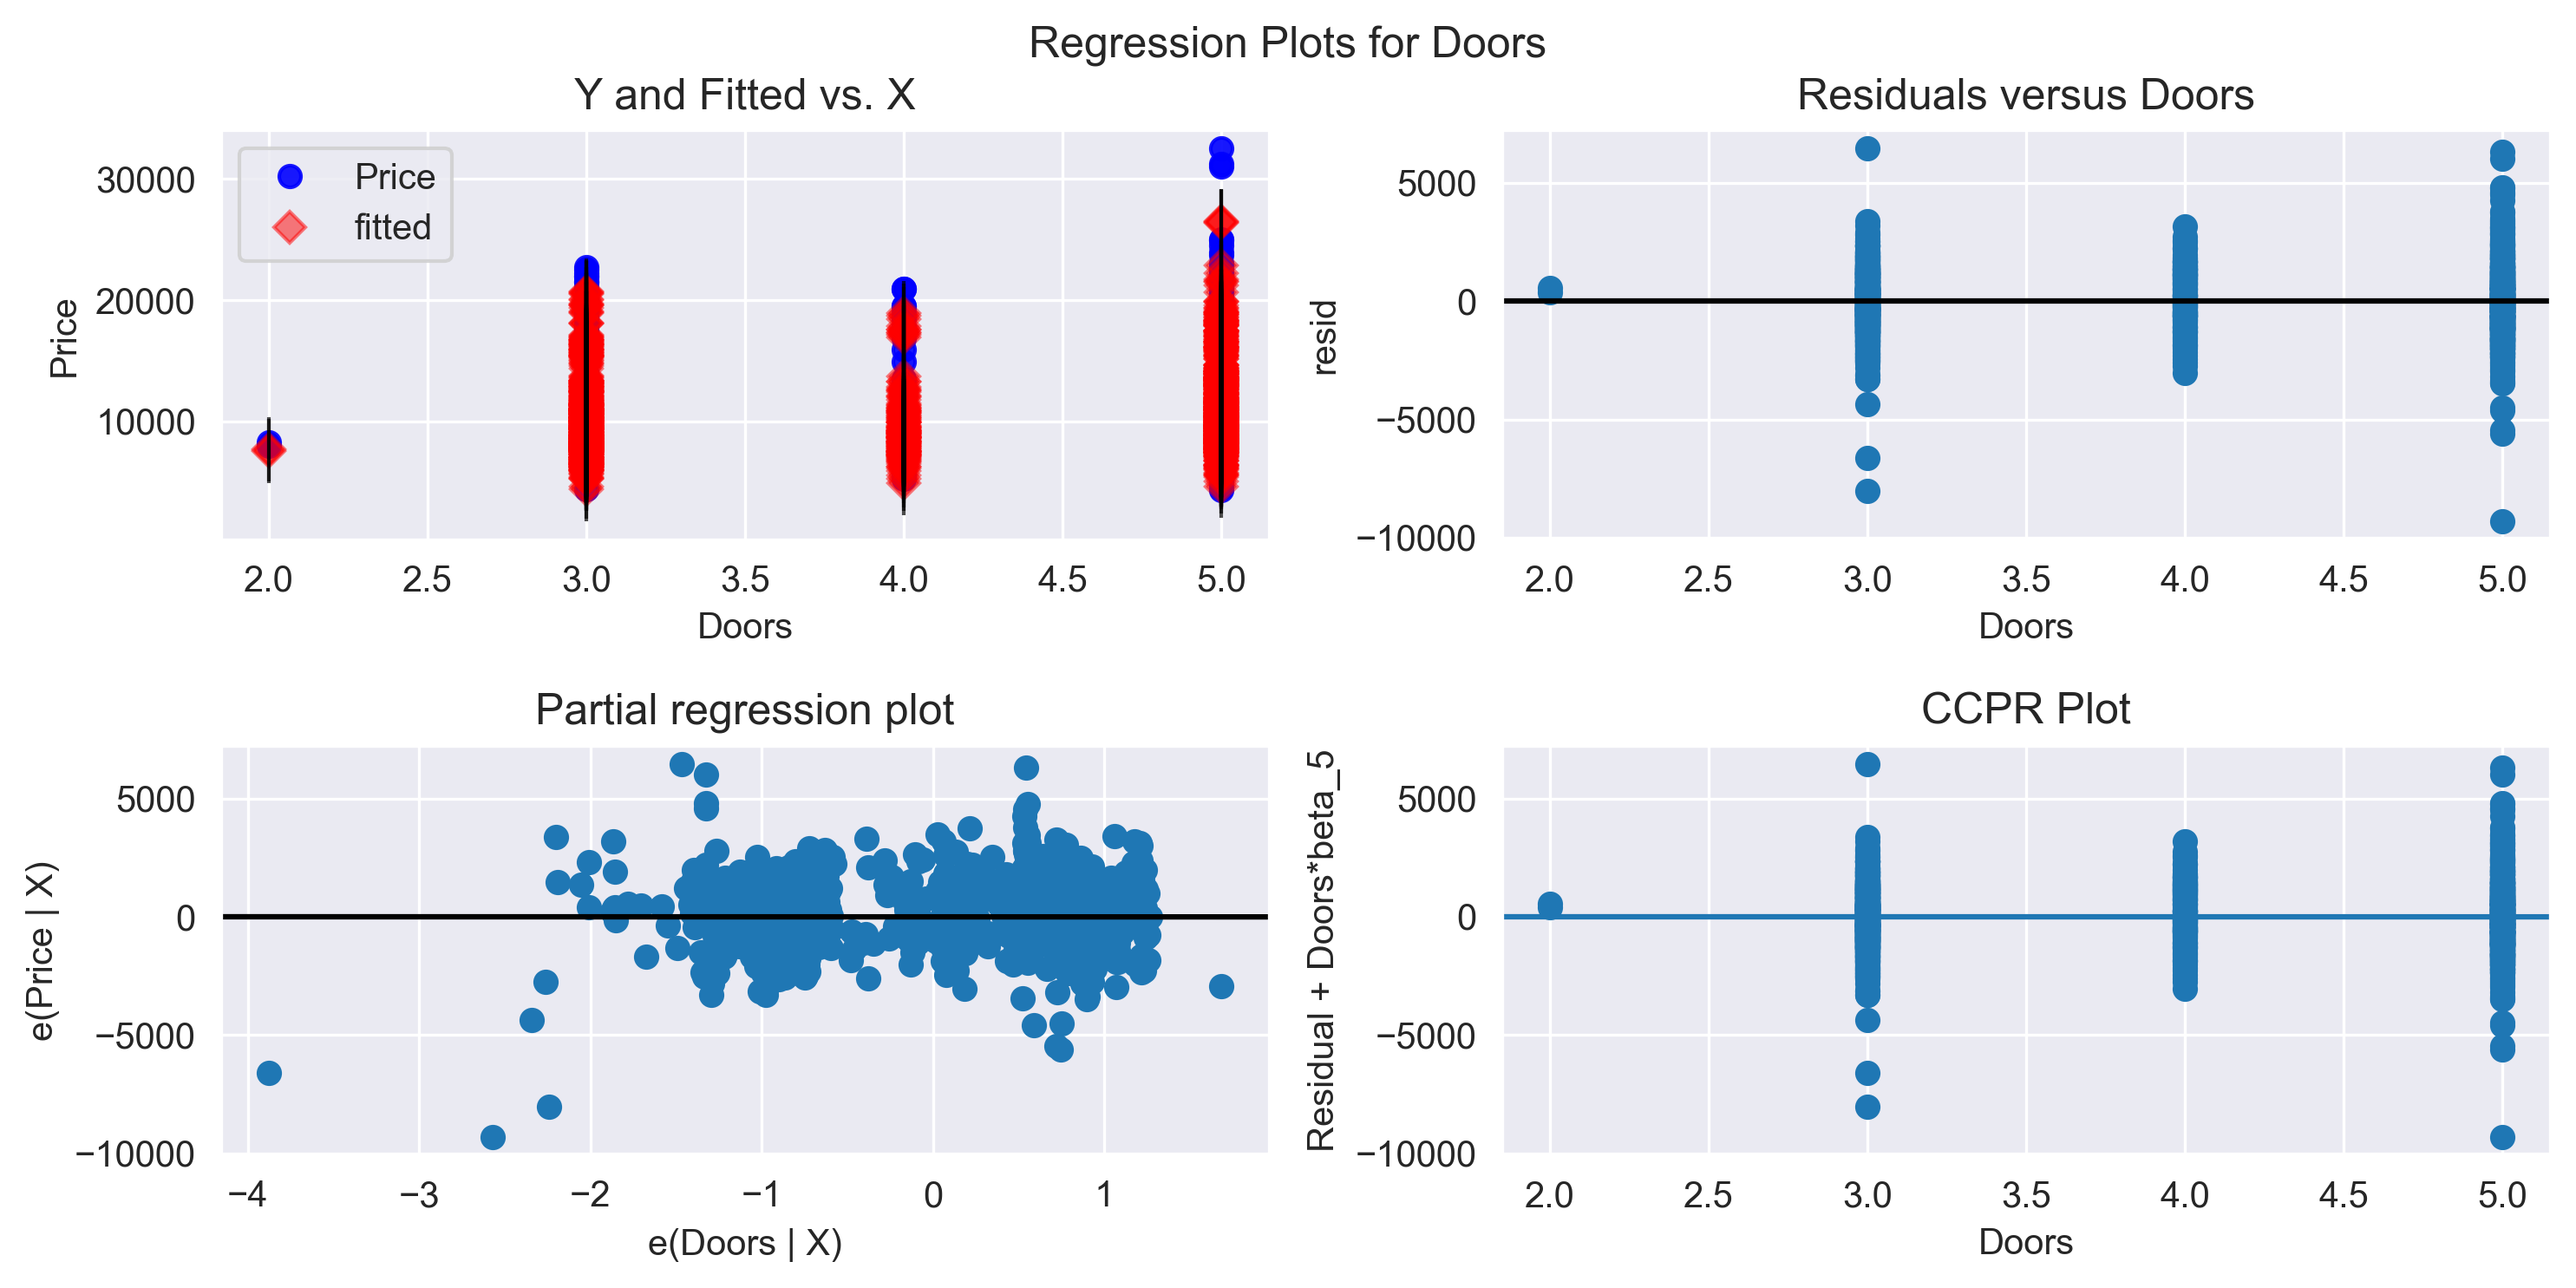

In [95]:
sm.graphics.plot_regress_exog(model,'Doors');

eval_env: 1


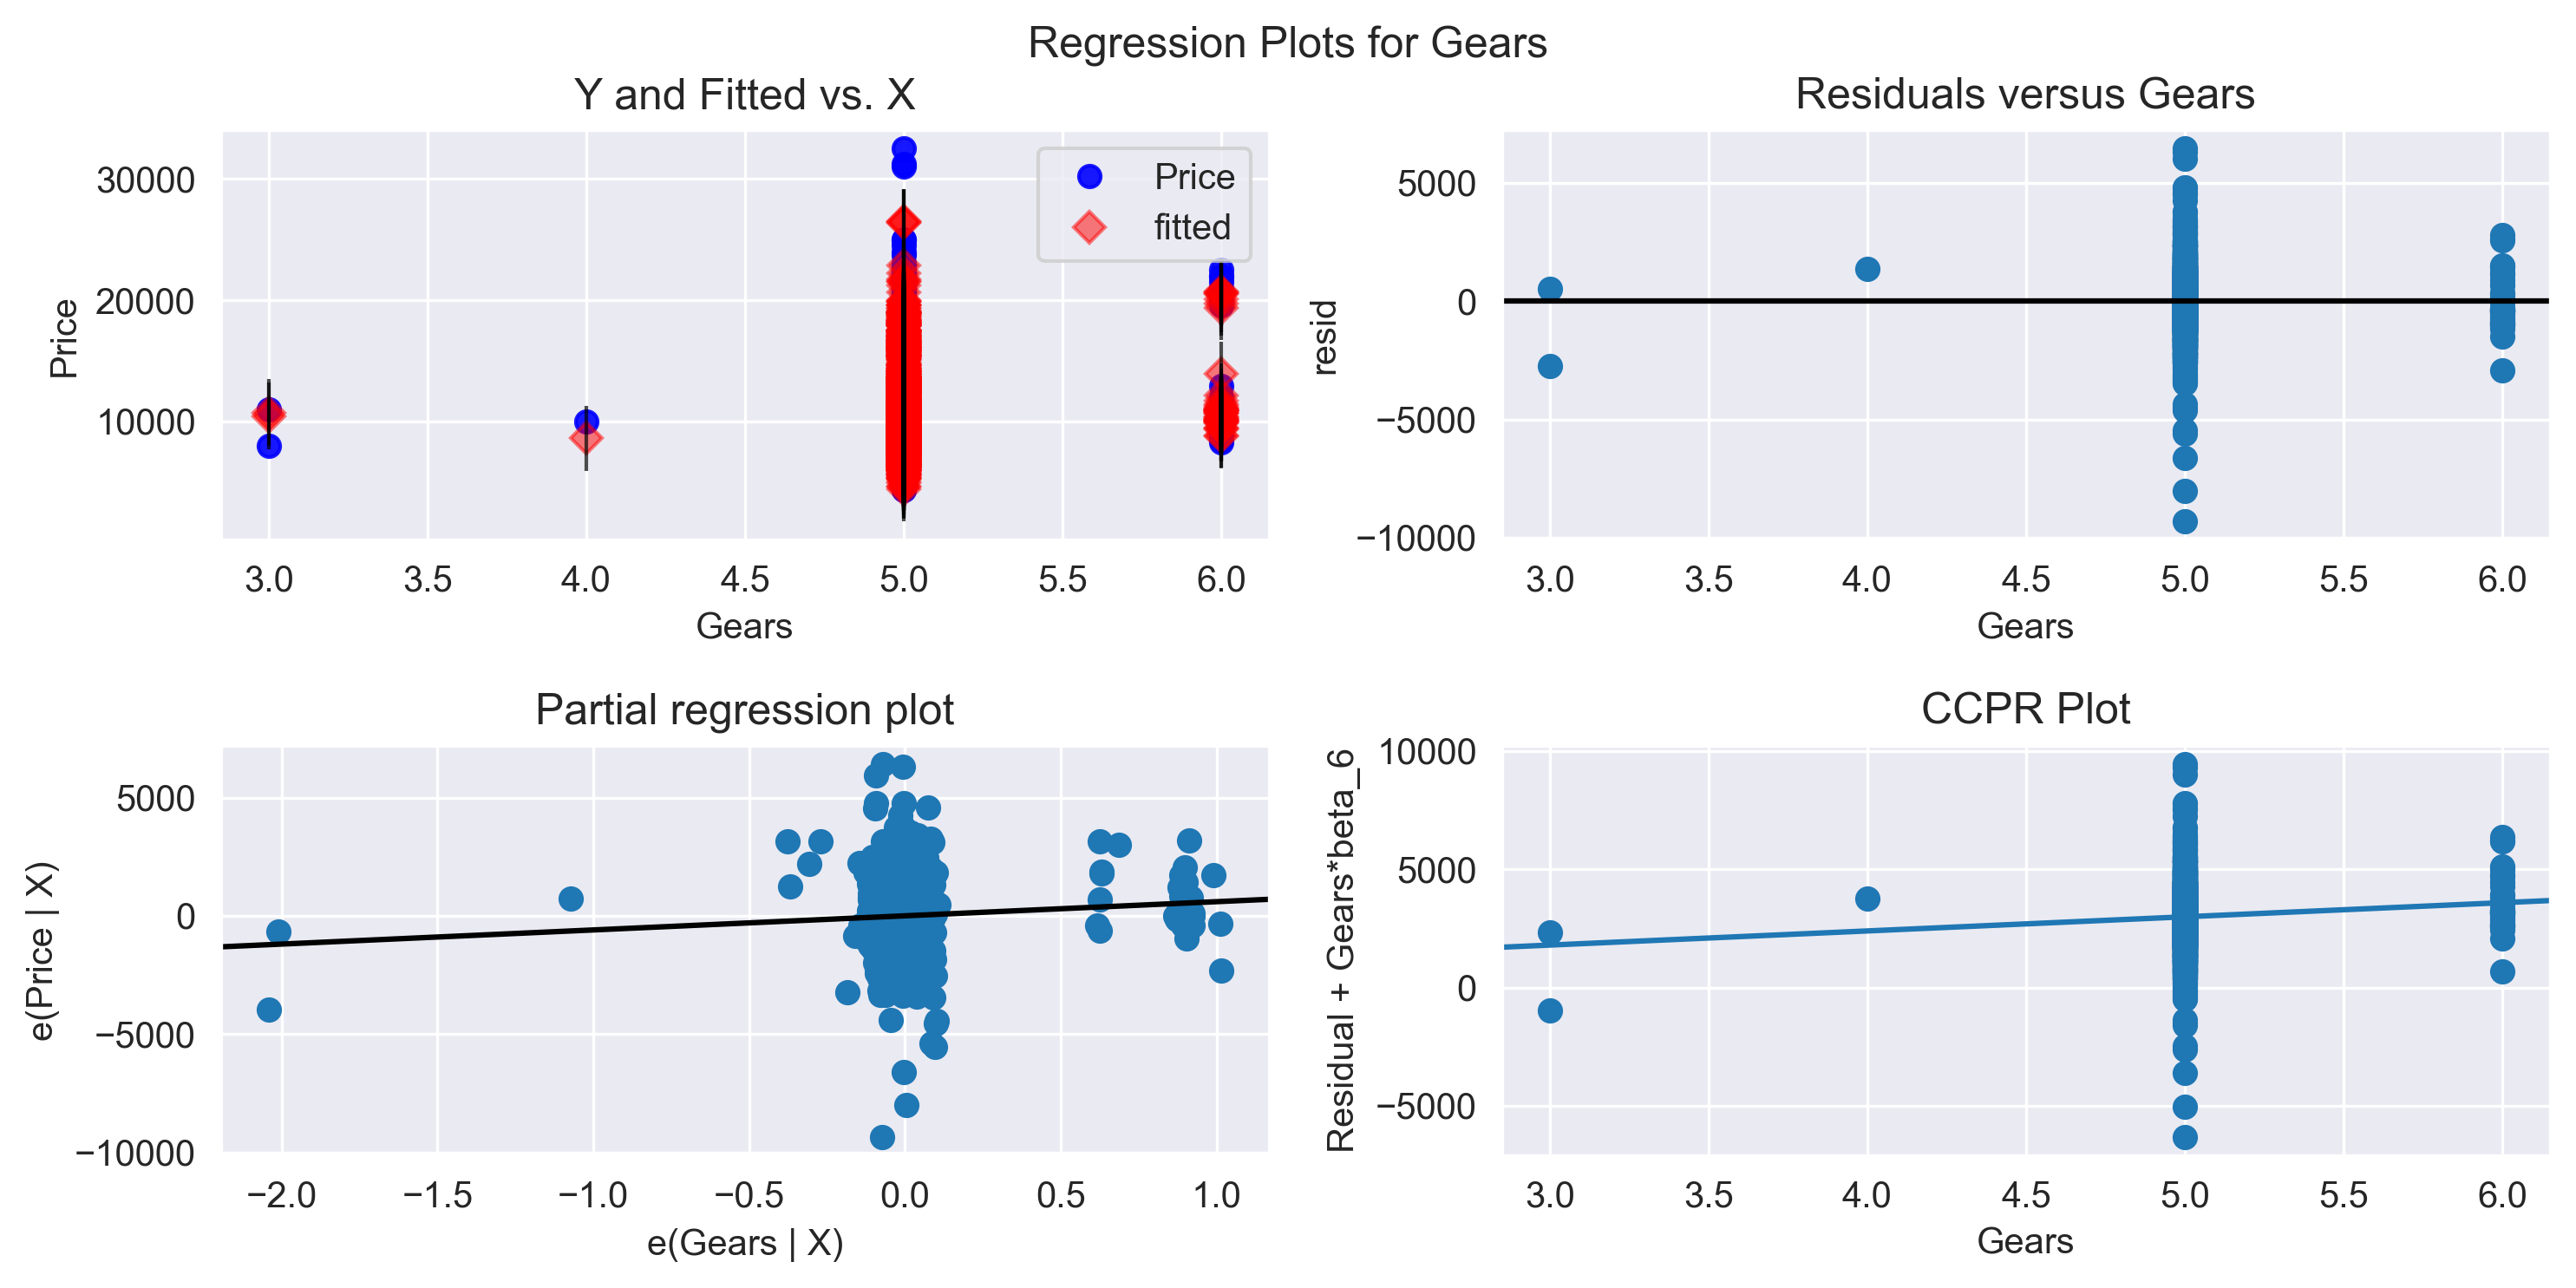

In [96]:
sm.graphics.plot_regress_exog(model,'Gears');

eval_env: 1


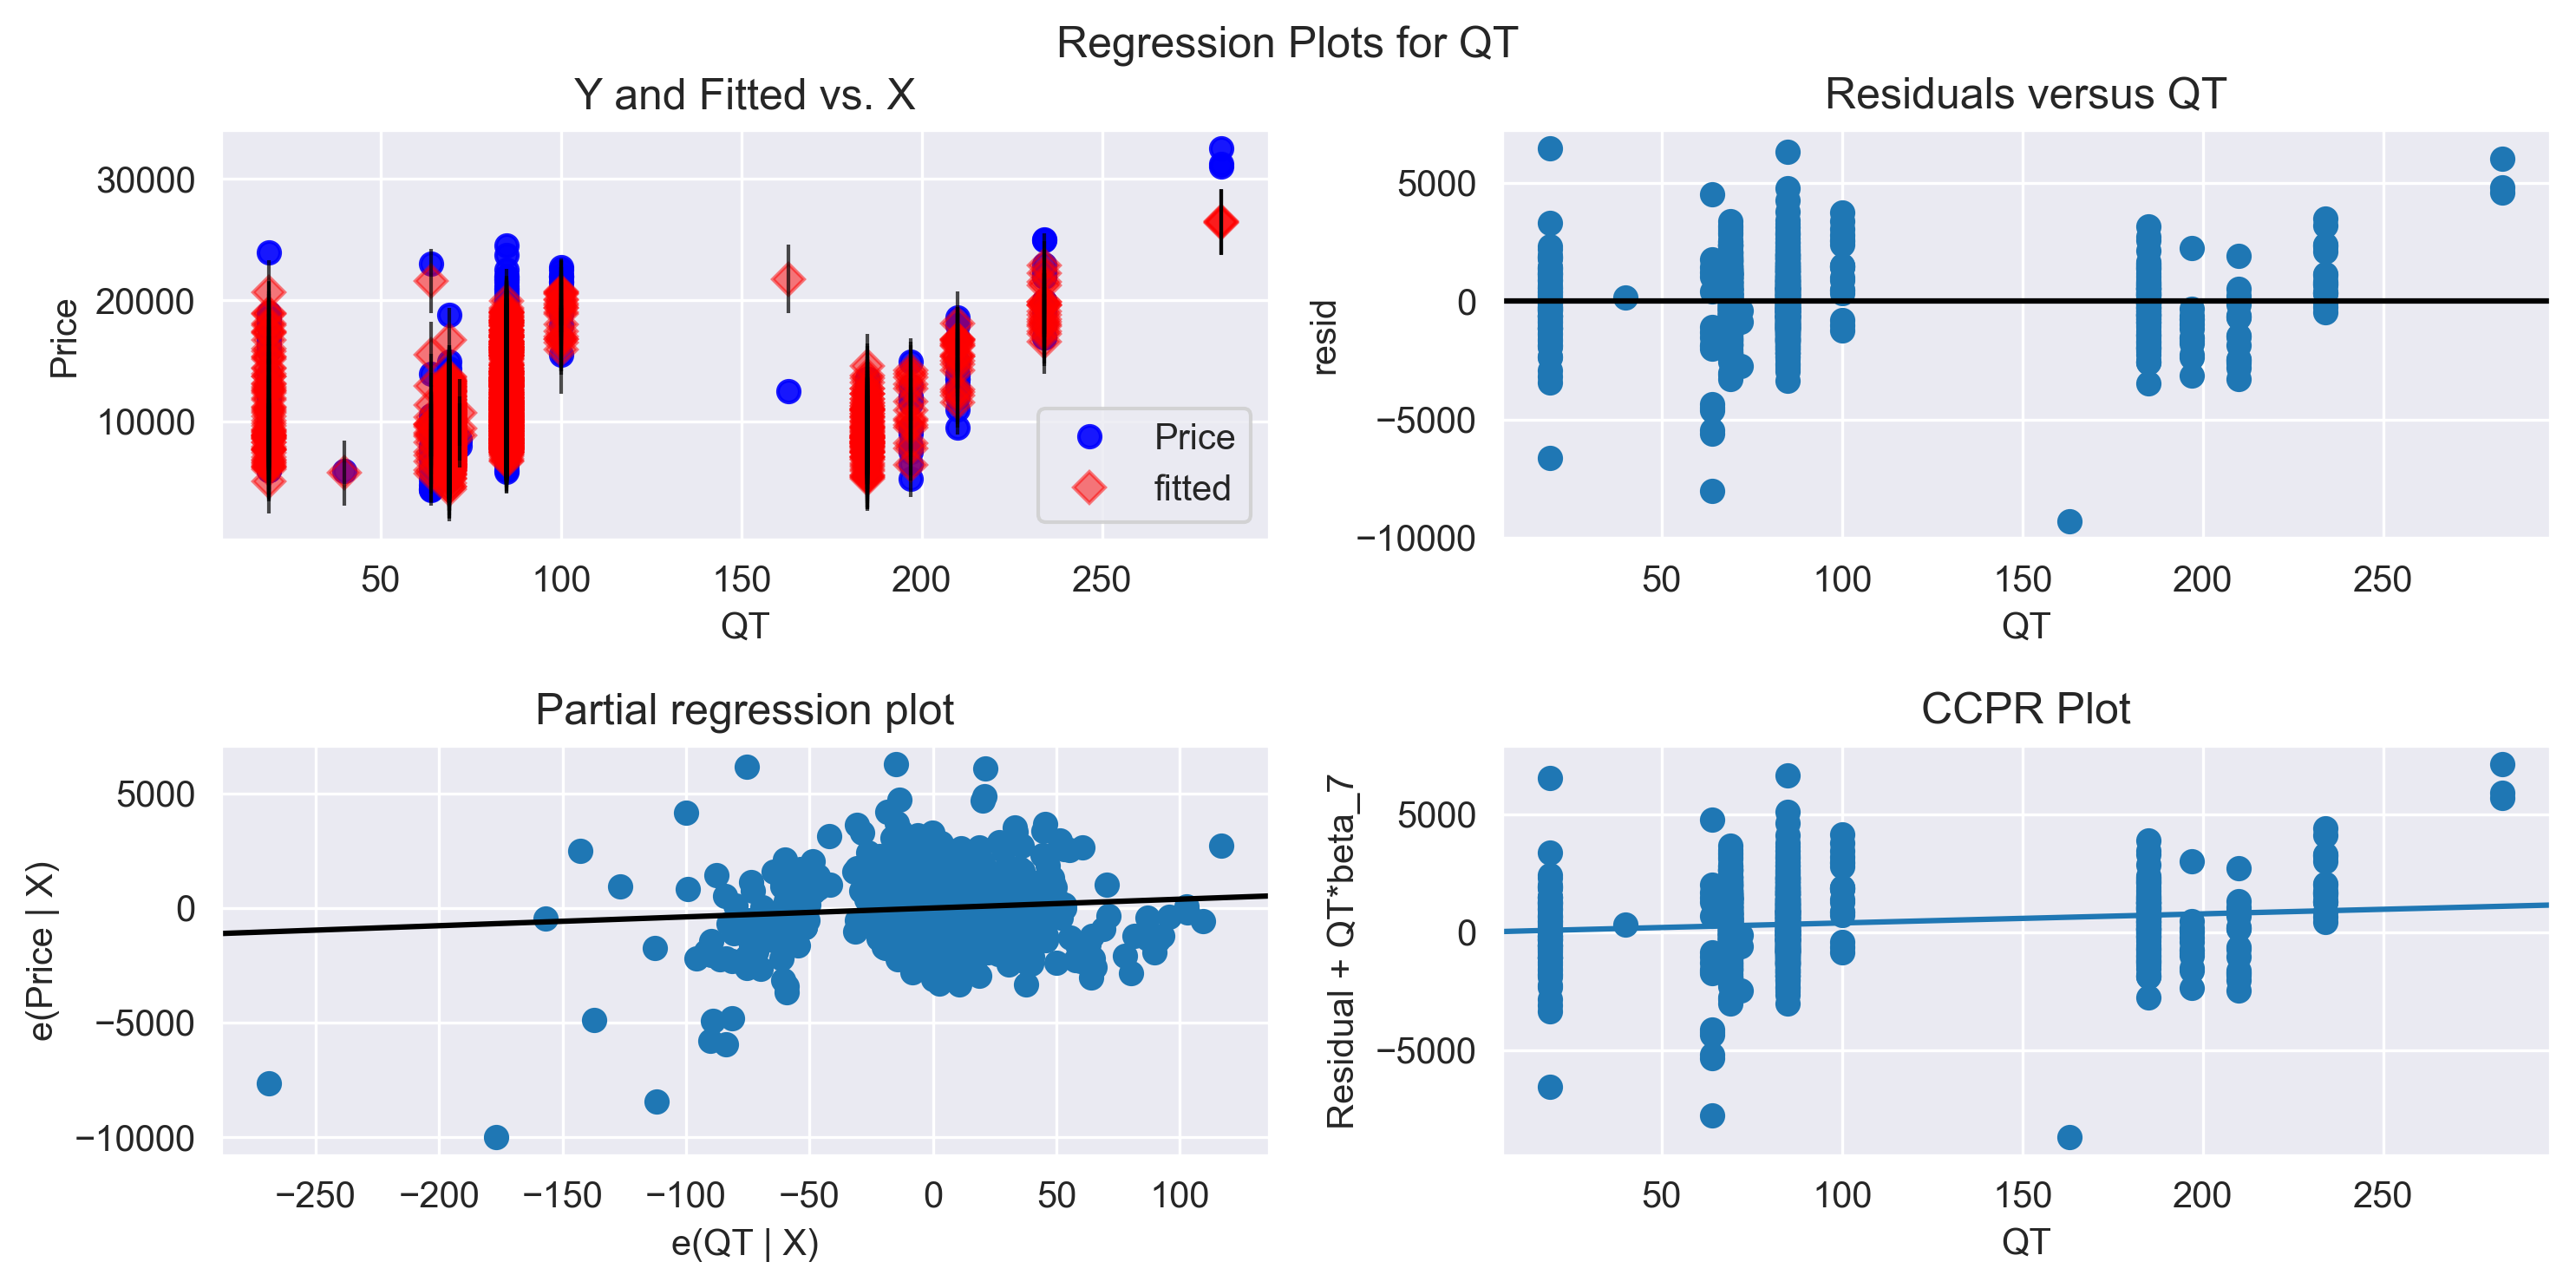

In [97]:
sm.graphics.plot_regress_exog(model,'QT');

eval_env: 1


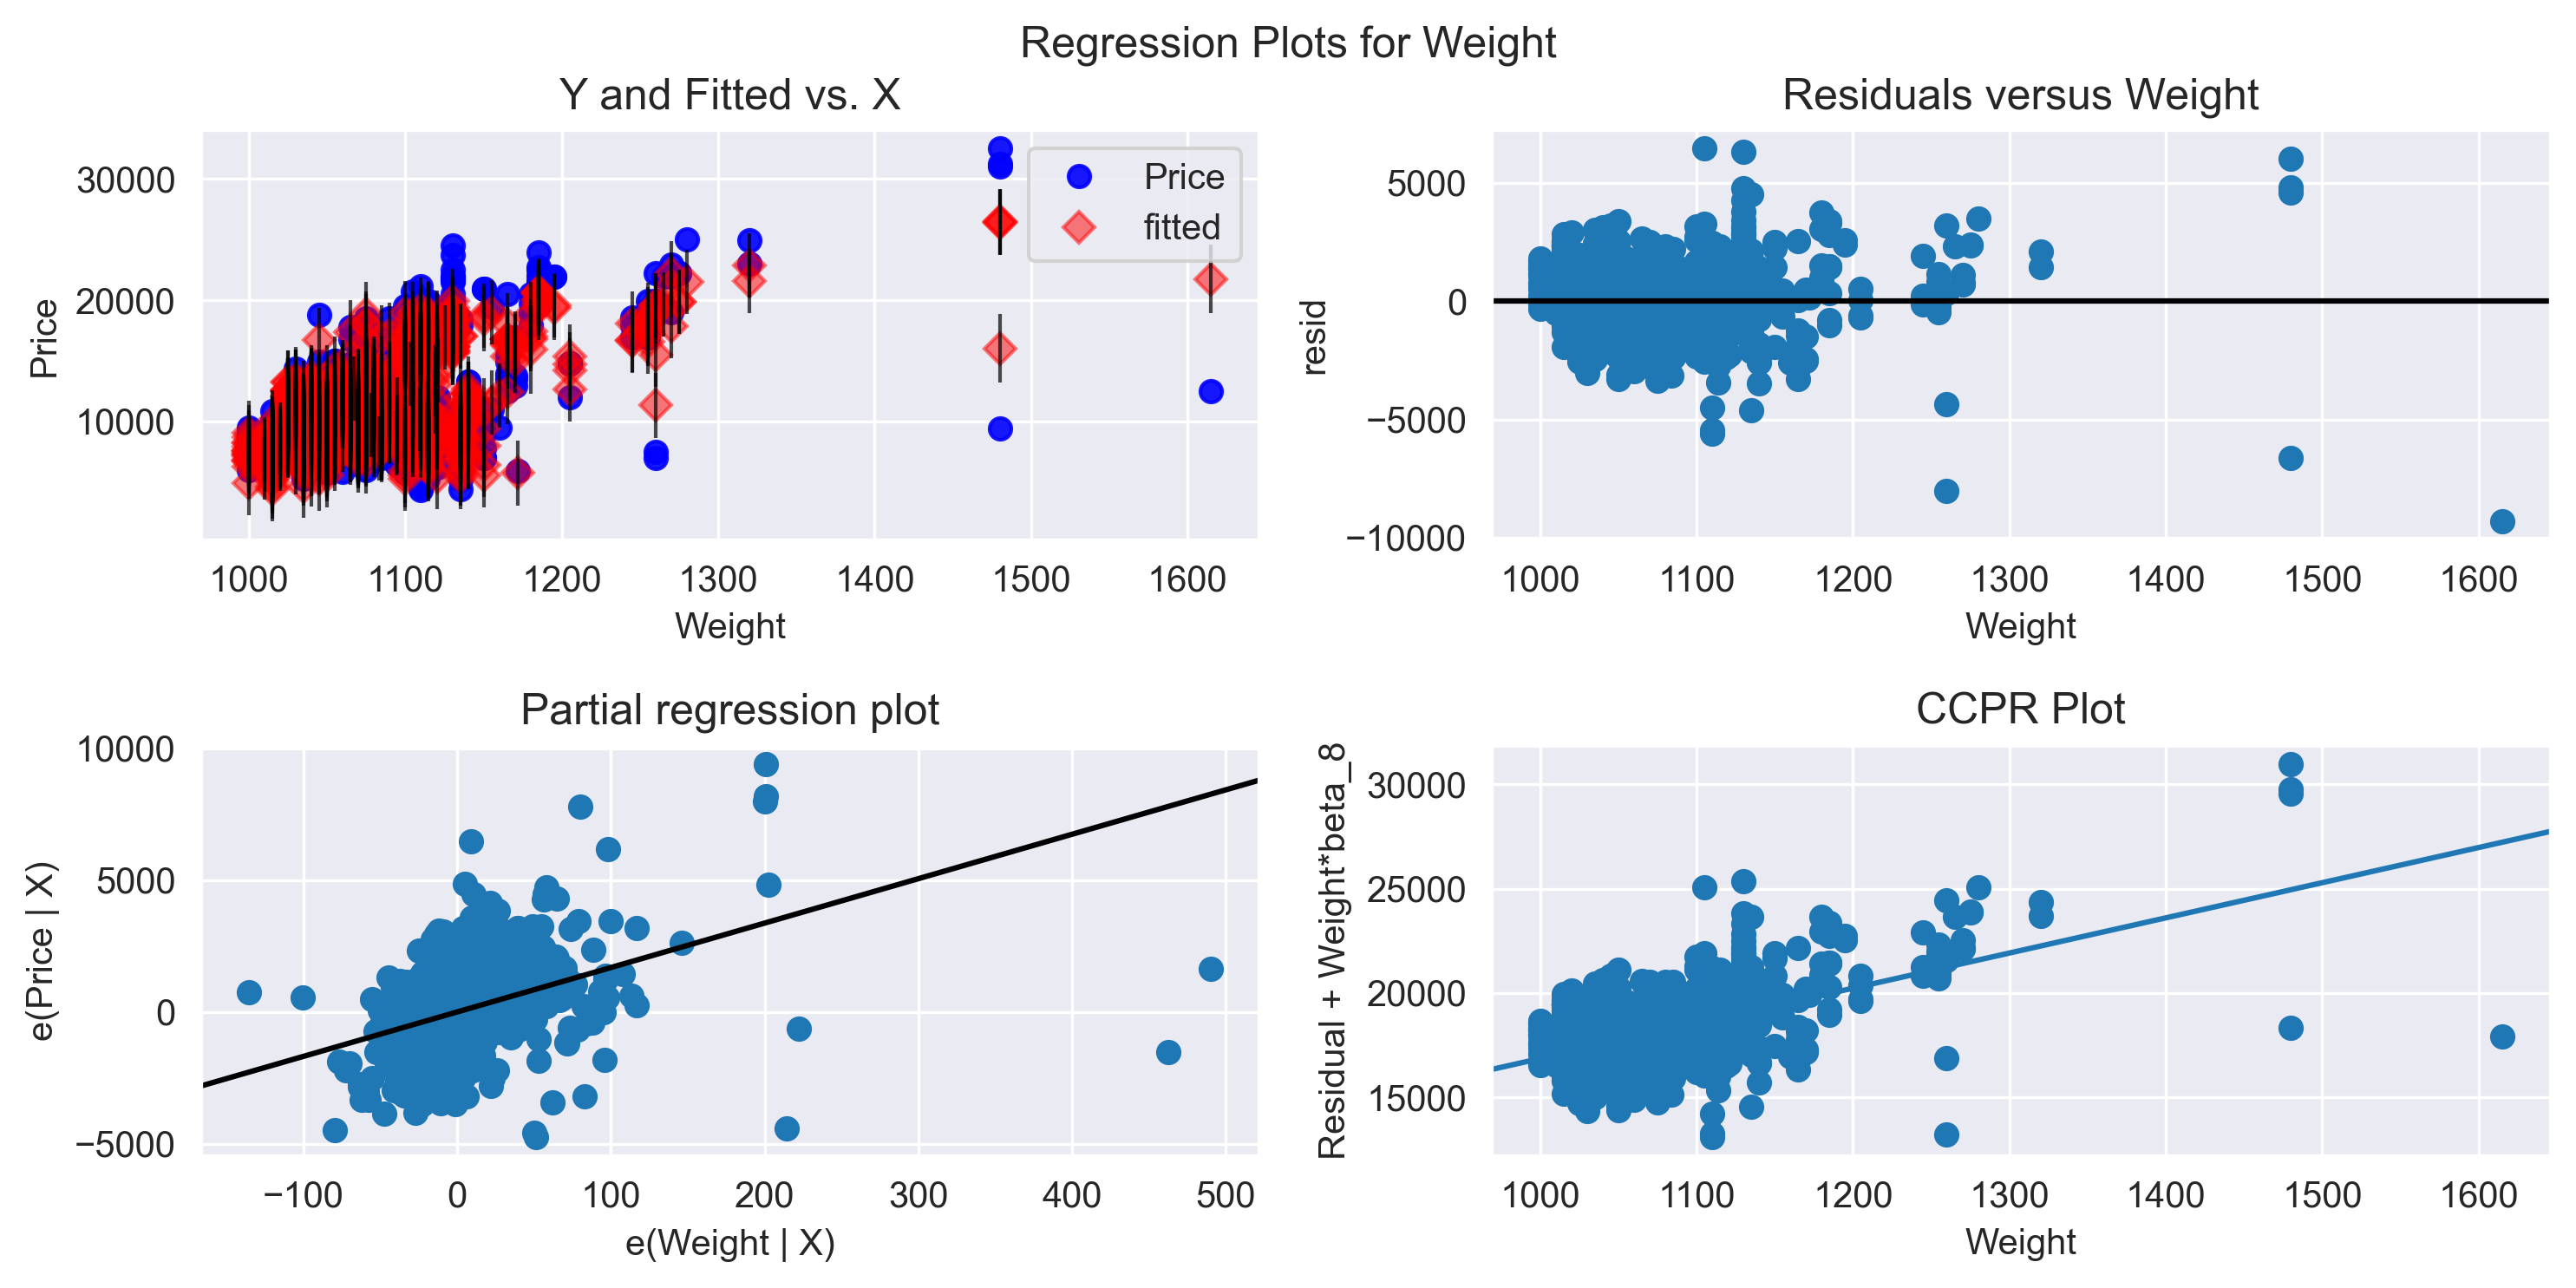

In [98]:
sm.graphics.plot_regress_exog(model,'Weight');

# MODEL DELETION TECHNIQUES¶

# Cooks Distance

In [99]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()

In [100]:
inf = model.get_influence()
c,p = inf.cooks_distance

In [101]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

<StemContainer object of 3 artists>

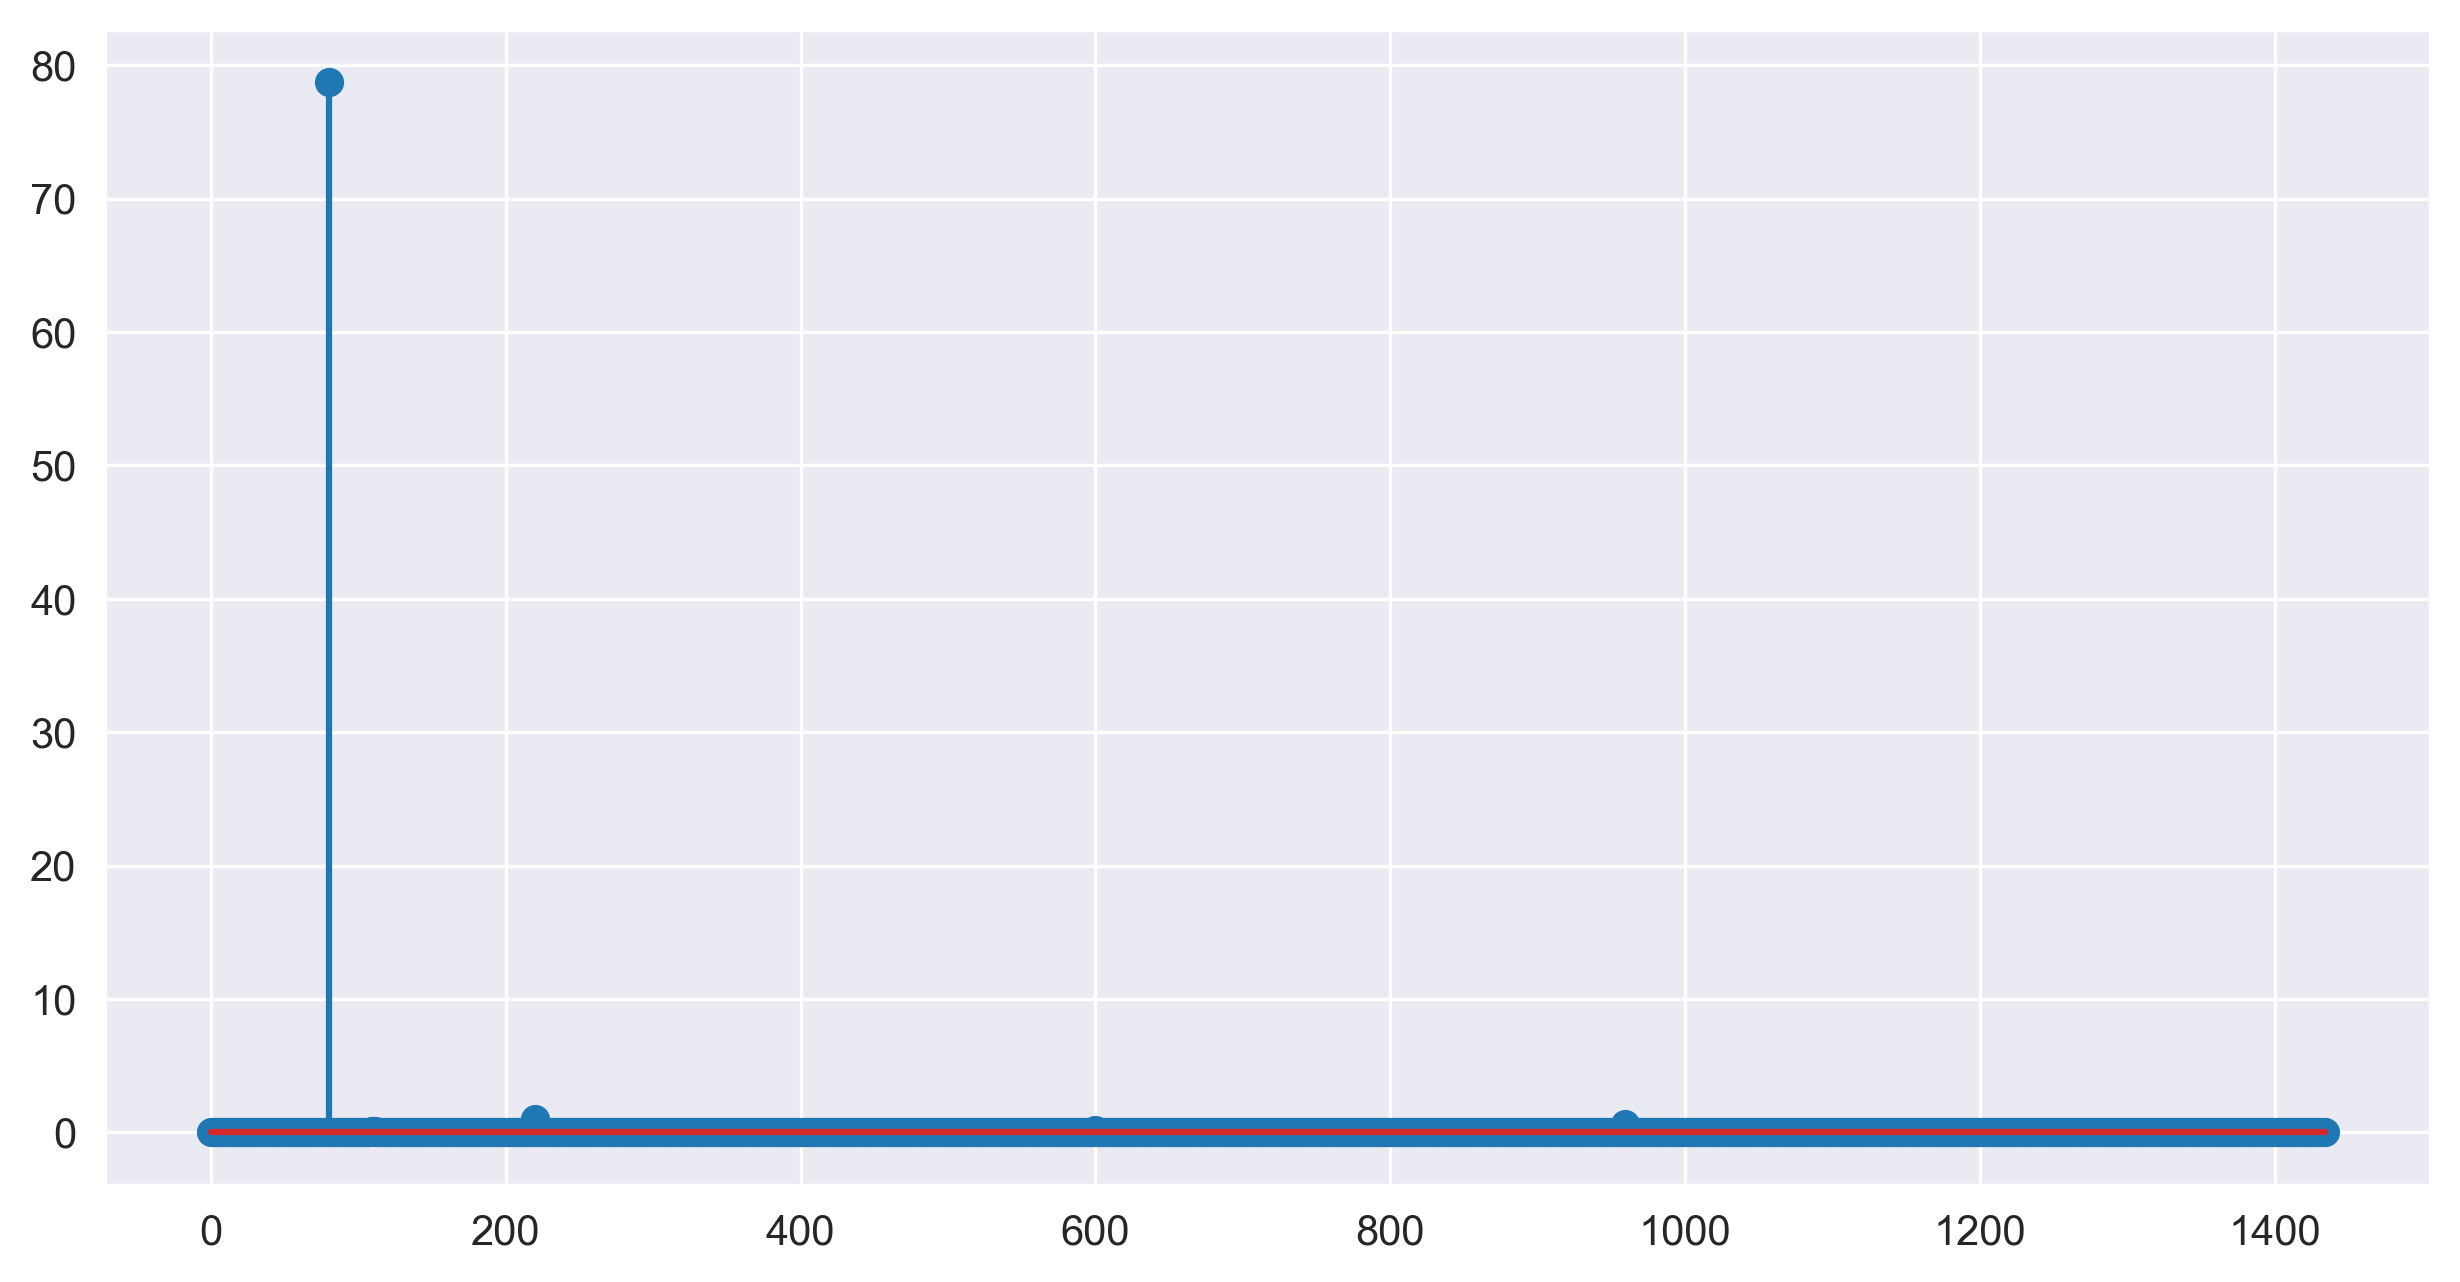

In [103]:
# cooks Distance Plot
plt.stem(c)

In [104]:
np.argmax(c),np.max(c)

(80, 78.7295058224916)

In [105]:
df.iloc[[80]]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

In [106]:
#  influence plot
from statsmodels.graphics.regressionplots import influence_plot

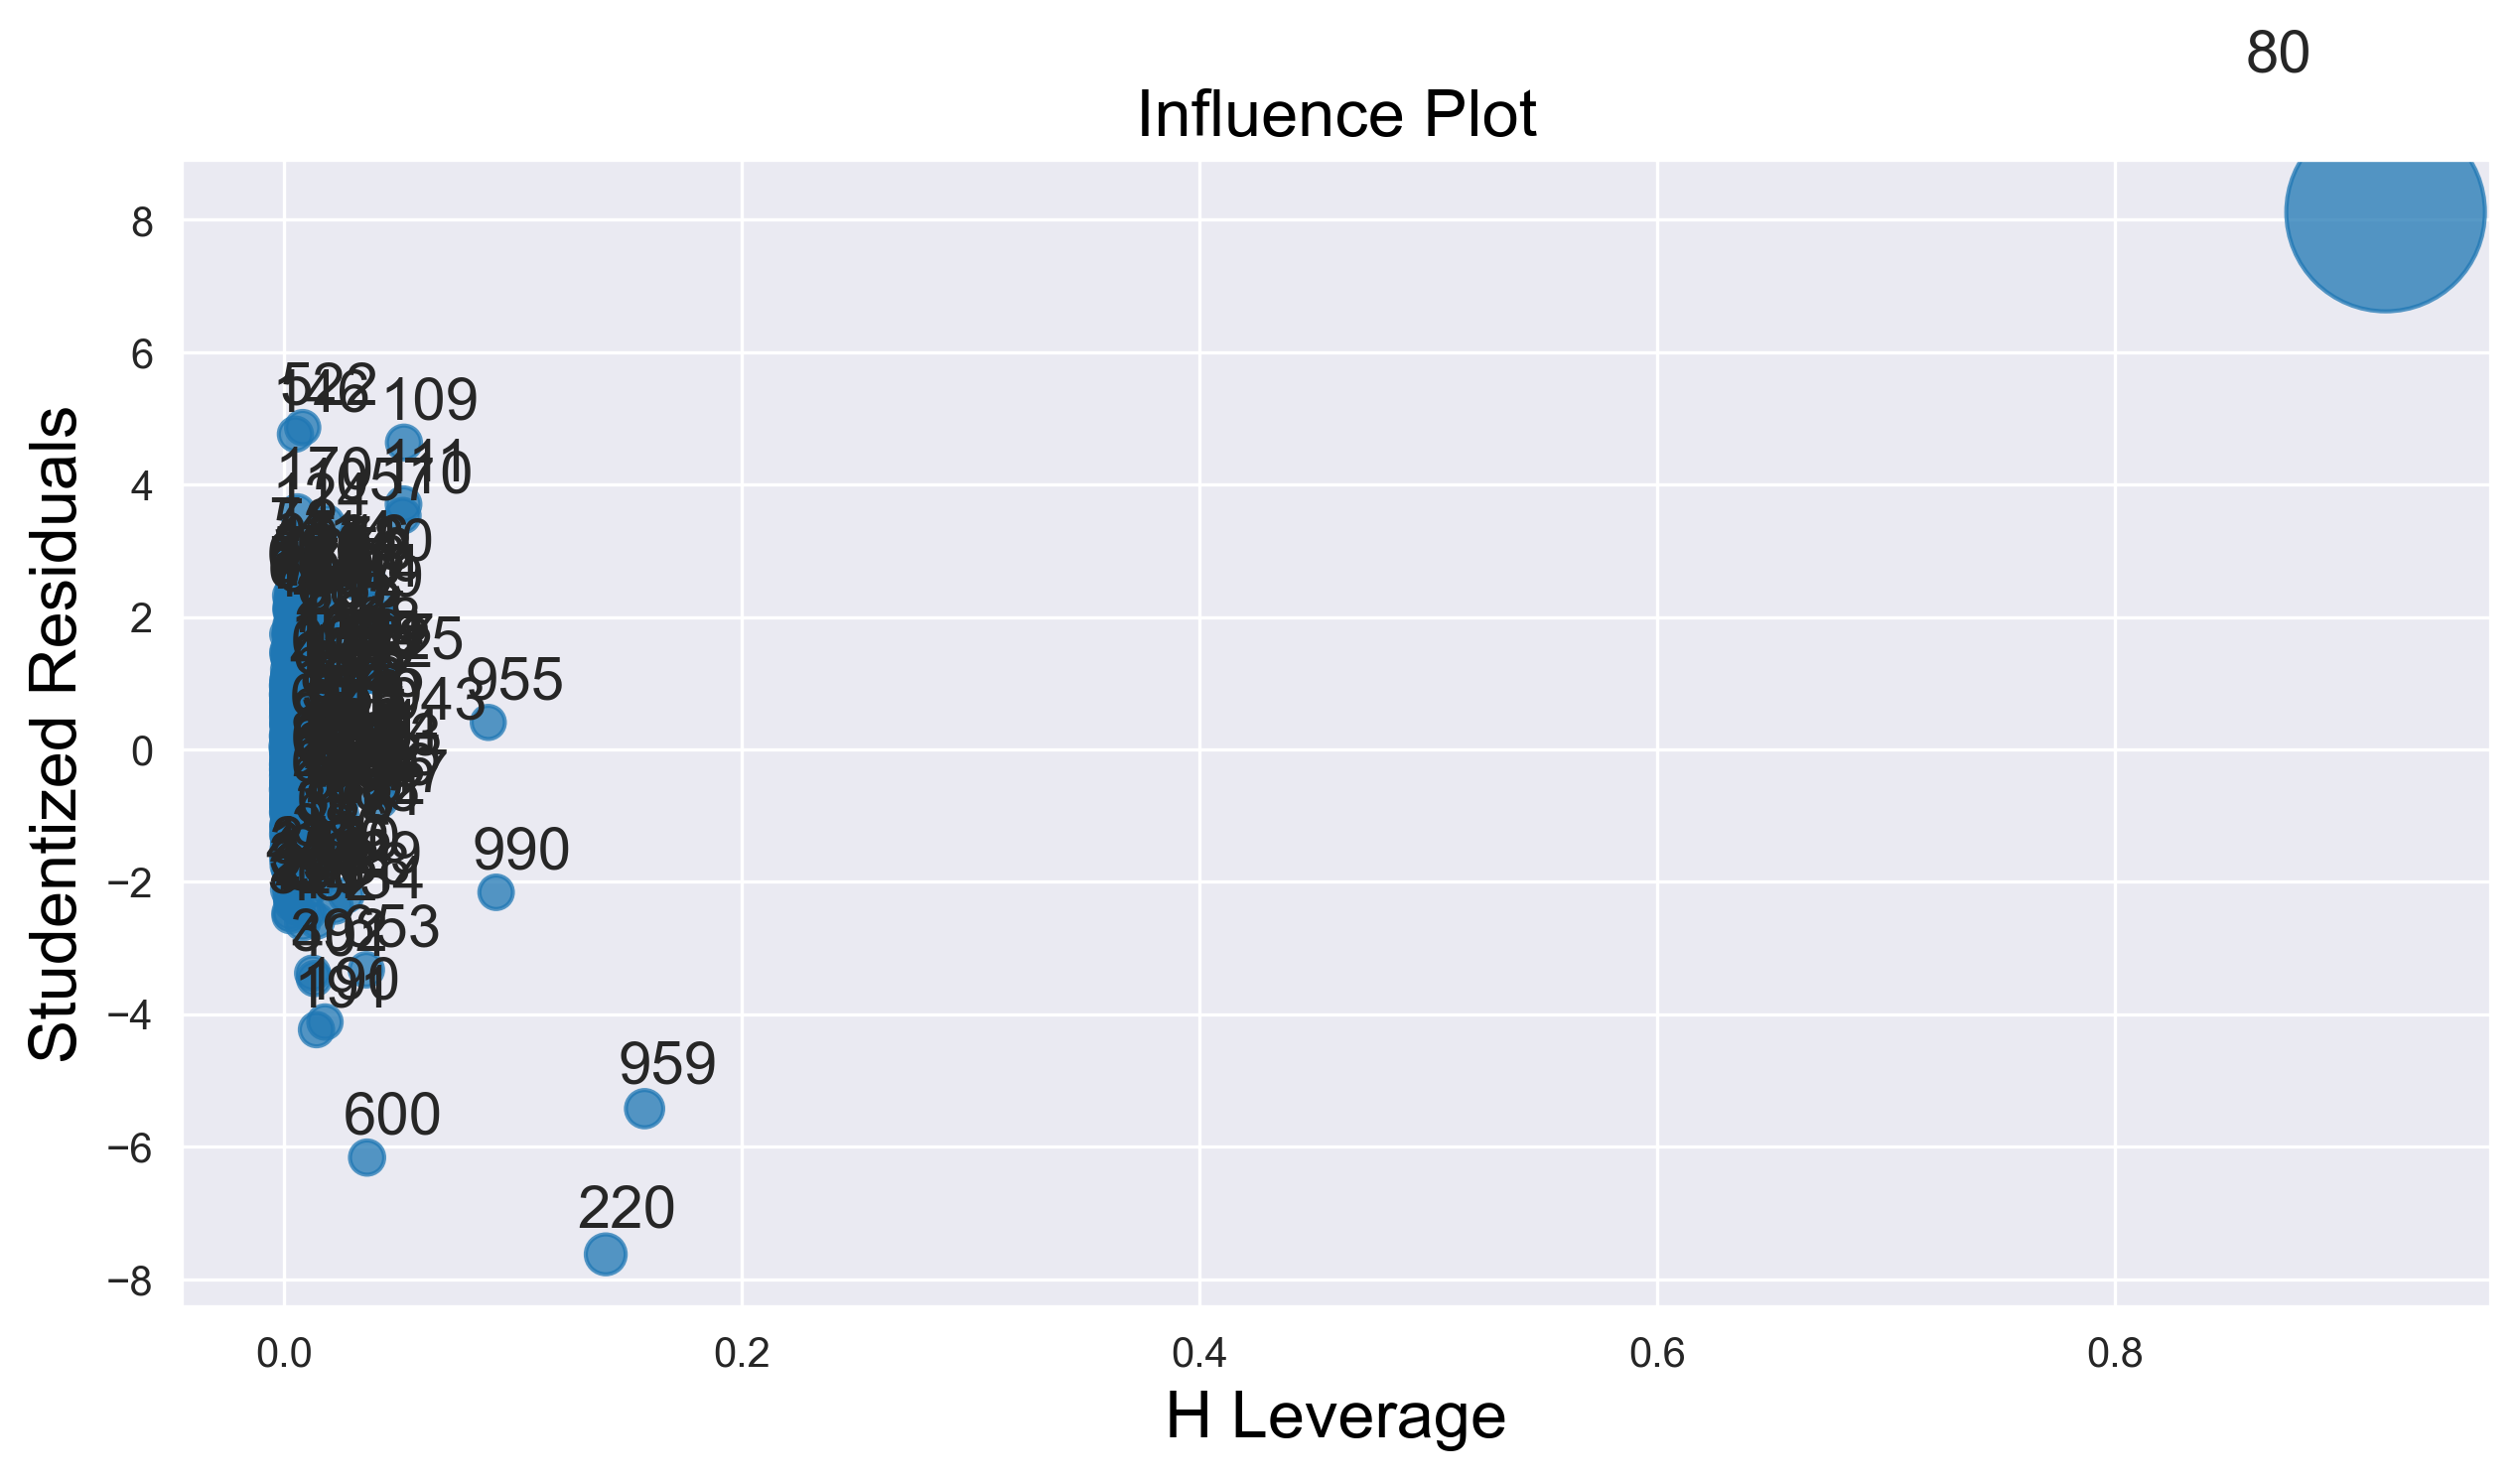

In [107]:
influence_plot(model);

In [108]:
#  Calculate Cutoff
k = len(df.columns)
n = len(df)

levarge_cutoff = 3*(k+1)/n
levarge_cutoff

0.020905923344947737

# Improving the model

In [109]:
df.drop(index=[80],inplace=True)

In [110]:
df.reset_index(inplace=True)

In [111]:
df

index  Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0         0  13500   23  46986   90  2000      3      5  210    1165
1         1  13750   23  72937   90  2000      3      5  210    1165
2         2  13950   24  41711   90  2000      3      5  210    1165
3         3  14950   26  48000   90  2000      3      5  210    1165
4         4  13750   30  38500   90  2000      3      5  210    1170
...     ...    ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   1430   7500   69  20544   86  1300      3      5   69    1025
1430   1431  10845   72  19000   86  1300      3      5   69    1015
1431   1432   8500   71  17016   86  1300      3      5   69    1015
1432   1433   7250   70  16916   86  1300      3      5   69    1015
1433   1434   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 10 columns]

In [112]:
df.drop(columns=['index'],inplace=True)

In [113]:
df

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

In [114]:
 model.rsquared

0.8625200256947

In [115]:
newdf = pd.DataFrame({'Age':26,'KM':35000,'HP':95,'CC':1500,'Doors':4,'Gears':5,'QT':250,'Weight':1400},index=[0])
newdf

Age     KM  HP    CC  Doors  Gears   QT  Weight
0   26  35000  95  1500      4      5  250    1400

In [116]:
model.predict(newdf)

0    21007.045975
dtype: float64

In [117]:
model.predict(df)

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1429     8794.255037
1430     8292.577342
1431     8455.434402
1432     8579.222041
1433    10396.087526
Length: 1434, dtype: float64

In [118]:
rs = pd.DataFrame({
    'Pred_Model': ['Model','Final_Model'],
    'Rsquared' : [model.rsquared_adj,model.rsquared]
})


In [119]:
rs

Pred_Model  Rsquared
0        Model  0.861749
1  Final_Model  0.862520